In [1]:
import pandas as pd
import numpy as np

from config_and_dependencies.config import * 

In [2]:
results_df = pd.read_csv('predictions.csv')

In [3]:
results_df.head()

Unnamed: 0  class_number        FH        ER        WW        TC        CS  \
0           0             9  0.015417  0.012917  0.050833  0.000833  0.003750   
1           1             9  0.020000  0.020417  0.022500  0.037917  0.012917   
2           2             9  0.031250  0.021667  0.029583  0.044167  0.002083   
3           3             2  0.059167  0.051250  0.252083  0.027083  0.005000   
4           4             2  0.063333  0.060833  0.266250  0.014167  0.003333   

         KQ        AR        SL  ...        PF        WH        SQ        WN  \
0  0.093333  0.001667  0.111250  ...  0.000833  0.068333  0.022083  0.028333   
1  0.057083  0.000000  0.065000  ...  0.000000  0.032500  0.011250  0.004167   
2  0.040417  0.000000  0.025833  ...  0.000000  0.063333  0.021250  0.012917   
3  0.076250  0.000417  0.065000  ...  0.000417  0.029167  0.015000  0.032917   
4  0.095417  0.002500  0.037083  ...  0.001250  0.037917  0.012917  0.042083   

         BH        PH        LB  Analysis  inlierLabel class_predictions  
0  0.030417  0.178333  0.006667  005_AB_1           -1             other  
1  0.052083  0.191667  0.013750  006_AB_1           -1             other  
2  0.007500  0.236250  0.006667  007_AB_1            1                WB  
3  0.000417  0.092083  0.006667  008_AB_2           -1             other  
4  0.001667  0.087500  0.006250  009_AB_2            1                WW  

[5 rows x 22 columns]

In [4]:
my_data = pd.read_csv(data_input_path)

In [5]:
print(my_data['Site'].unique())

['FH' 'ER' 'WW' 'TC' 'CS' 'BC' 'KQ' 'AR' 'SL' 'FG' 'WB' 'BX' 'PF' 'BM'
 'WH' 'SQ' 'BP' 'WN' 'BH' 'PH' 'LB' 'AB' 'LV' 'BR' 'KY' 'BF' 'ST' 'SH'
 'CF' 'BG' 'AC' 'CR' 'GH' 'PX' 'WF' 'DH' 'NMAG_Gold' 'NMW_Gold' 'NMWGwern'
 'UBSS' 'Cefn' 'Stockley' 'Pucha' 'Woodbury' 'Pimple' 'Wellington'
 'Lyonshall' 'SymondsYatE' 'Madawg']


In [6]:
superficial_data = my_data[my_data['Analysis'] == 'Superficial'].astype(str)

In [7]:
print(superficial_data['Analysis'].unique())

[]


In [8]:
concatenated_df = pd.concat([results_df, superficial_data[['Site']]], axis=1)

In [9]:
concatenated_df.head()

Unnamed: 0  class_number        FH        ER        WW        TC        CS  \
0           0             9  0.015417  0.012917  0.050833  0.000833  0.003750   
1           1             9  0.020000  0.020417  0.022500  0.037917  0.012917   
2           2             9  0.031250  0.021667  0.029583  0.044167  0.002083   
3           3             2  0.059167  0.051250  0.252083  0.027083  0.005000   
4           4             2  0.063333  0.060833  0.266250  0.014167  0.003333   

         KQ        AR        SL  ...        WH        SQ        WN        BH  \
0  0.093333  0.001667  0.111250  ...  0.068333  0.022083  0.028333  0.030417   
1  0.057083  0.000000  0.065000  ...  0.032500  0.011250  0.004167  0.052083   
2  0.040417  0.000000  0.025833  ...  0.063333  0.021250  0.012917  0.007500   
3  0.076250  0.000417  0.065000  ...  0.029167  0.015000  0.032917  0.000417   
4  0.095417  0.002500  0.037083  ...  0.037917  0.012917  0.042083  0.001667   

         PH        LB  Analysis  inlierLabel  class_predictions Site  
0  0.178333  0.006667  005_AB_1           -1              other  NaN  
1  0.191667  0.013750  006_AB_1           -1              other  NaN  
2  0.236250  0.006667  007_AB_1            1                 WB  NaN  
3  0.092083  0.006667  008_AB_2           -1              other  NaN  
4  0.087500  0.006250  009_AB_2            1                 WW  NaN  

[5 rows x 23 columns]

In [10]:
concatenated_df = concatenated_df[['Analysis'] + [col for col in concatenated_df.columns if col != 'Analysis']]

In [11]:
concatenated_df.head()

Analysis  Unnamed: 0  class_number        FH        ER        WW        TC  \
0  005_AB_1           0             9  0.015417  0.012917  0.050833  0.000833   
1  006_AB_1           1             9  0.020000  0.020417  0.022500  0.037917   
2  007_AB_1           2             9  0.031250  0.021667  0.029583  0.044167   
3  008_AB_2           3             2  0.059167  0.051250  0.252083  0.027083   
4  009_AB_2           4             2  0.063333  0.060833  0.266250  0.014167   

         CS        KQ        AR  ...        PF        WH        SQ        WN  \
0  0.003750  0.093333  0.001667  ...  0.000833  0.068333  0.022083  0.028333   
1  0.012917  0.057083  0.000000  ...  0.000000  0.032500  0.011250  0.004167   
2  0.002083  0.040417  0.000000  ...  0.000000  0.063333  0.021250  0.012917   
3  0.005000  0.076250  0.000417  ...  0.000417  0.029167  0.015000  0.032917   
4  0.003333  0.095417  0.002500  ...  0.001250  0.037917  0.012917  0.042083   

         BH        PH        LB  inlierLabel  class_predictions  Site  
0  0.030417  0.178333  0.006667           -1              other   NaN  
1  0.052083  0.191667  0.013750           -1              other   NaN  
2  0.007500  0.236250  0.006667            1                 WB   NaN  
3  0.000417  0.092083  0.006667           -1              other   NaN  
4  0.001667  0.087500  0.006250            1                 WW   NaN  

[5 rows x 23 columns]

In [12]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Analysis           432 non-null    object 
 1   Unnamed: 0         432 non-null    int64  
 2   class_number       432 non-null    int64  
 3   FH                 432 non-null    float64
 4   ER                 432 non-null    float64
 5   WW                 432 non-null    float64
 6   TC                 432 non-null    float64
 7   CS                 432 non-null    float64
 8   KQ                 432 non-null    float64
 9   AR                 432 non-null    float64
 10  SL                 432 non-null    float64
 11  FG                 432 non-null    float64
 12  WB                 432 non-null    float64
 13  PF                 432 non-null    float64
 14  WH                 432 non-null    float64
 15  SQ                 432 non-null    float64
 16  WN                 432 non

In [13]:
superficial_data.head()

Empty DataFrame
Columns: [Analysis, Geology, Province, Region, Site, SubSite, Formation, Band, Nodule, Li7, Be9, B11, Mg24, Al27, Si28, P31, S33, K39, Ca42, Sc45, Ti47, V51, Cr52, Mn55, Fe56, Co59, Ni60, Cu63, Zn68, Ga69, Ge72, As75, Rb85, Sr88, Y89, Zr90, Nb93, Mo95, Cd111, In115, Sn118, Cs133, Ba137, La139, Ce140, Pr141, Nd146, Sm147, Eu153, Gd157, Tb159, Dy163, Ho165, Er166, Tm169, Yb172, Lu175, Hf178, Ta181, Pb208, Th232, U238]
Index: []

[0 rows x 62 columns]

In [14]:
mask = my_data['Geology'] == 'Superficial'

In [15]:
nodule_data = my_data[mask]['Nodule'].reset_index(drop=True)

In [16]:
nodule_data.head()

0    AB_1
1    AB_1
2    AB_1
3    AB_2
4    AB_2
Name: Nodule, dtype: object

In [17]:
concatenated_df = pd.concat([nodule_data, concatenated_df], axis=1)

In [18]:
concatenated_df.head()

Nodule  Analysis  Unnamed: 0  class_number        FH        ER        WW  \
0   AB_1  005_AB_1         0.0           9.0  0.015417  0.012917  0.050833   
1   AB_1  006_AB_1         1.0           9.0  0.020000  0.020417  0.022500   
2   AB_1  007_AB_1         2.0           9.0  0.031250  0.021667  0.029583   
3   AB_2  008_AB_2         3.0           2.0  0.059167  0.051250  0.252083   
4   AB_2  009_AB_2         4.0           2.0  0.063333  0.060833  0.266250   

         TC        CS        KQ  ...        PF        WH        SQ        WN  \
0  0.000833  0.003750  0.093333  ...  0.000833  0.068333  0.022083  0.028333   
1  0.037917  0.012917  0.057083  ...  0.000000  0.032500  0.011250  0.004167   
2  0.044167  0.002083  0.040417  ...  0.000000  0.063333  0.021250  0.012917   
3  0.027083  0.005000  0.076250  ...  0.000417  0.029167  0.015000  0.032917   
4  0.014167  0.003333  0.095417  ...  0.001250  0.037917  0.012917  0.042083   

         BH        PH        LB  inlierLabel  class_predictions  Site  
0  0.030417  0.178333  0.006667         -1.0              other   NaN  
1  0.052083  0.191667  0.013750         -1.0              other   NaN  
2  0.007500  0.236250  0.006667          1.0                 WB   NaN  
3  0.000417  0.092083  0.006667         -1.0              other   NaN  
4  0.001667  0.087500  0.006250          1.0                 WW   NaN  

[5 rows x 24 columns]

In [19]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nodule             435 non-null    object 
 1   Analysis           432 non-null    object 
 2   Unnamed: 0         432 non-null    float64
 3   class_number       432 non-null    float64
 4   FH                 432 non-null    float64
 5   ER                 432 non-null    float64
 6   WW                 432 non-null    float64
 7   TC                 432 non-null    float64
 8   CS                 432 non-null    float64
 9   KQ                 432 non-null    float64
 10  AR                 432 non-null    float64
 11  SL                 432 non-null    float64
 12  FG                 432 non-null    float64
 13  WB                 432 non-null    float64
 14  PF                 432 non-null    float64
 15  WH                 432 non-null    float64
 16  SQ                 432 non

In [20]:
grouped = concatenated_df.groupby('Nodule')

In [21]:
grouped.head()

Nodule     Analysis  Unnamed: 0  class_number        FH        ER  \
0     AB_1     005_AB_1         0.0           9.0  0.015417  0.012917   
1     AB_1     006_AB_1         1.0           9.0  0.020000  0.020417   
2     AB_1     007_AB_1         2.0           9.0  0.031250  0.021667   
3     AB_2     008_AB_2         3.0           2.0  0.059167  0.051250   
4     AB_2     009_AB_2         4.0           2.0  0.063333  0.060833   
..     ...          ...         ...           ...       ...       ...   
430   WF_9  101_WF_10_2       430.0          15.0  0.007500  0.121667   
431   WF_9  102_WF_10_3       431.0           3.0  0.007917  0.156250   
432  WF_10          NaN         NaN           NaN       NaN       NaN   
433  WF_10          NaN         NaN           NaN       NaN       NaN   
434  WF_10          NaN         NaN           NaN       NaN       NaN   

           WW        TC        CS        KQ  ...        PF        WH  \
0    0.050833  0.000833  0.003750  0.093333  ...  0.000833  0.068333   
1    0.022500  0.037917  0.012917  0.057083  ...  0.000000  0.032500   
2    0.029583  0.044167  0.002083  0.040417  ...  0.000000  0.063333   
3    0.252083  0.027083  0.005000  0.076250  ...  0.000417  0.029167   
4    0.266250  0.014167  0.003333  0.095417  ...  0.001250  0.037917   
..        ...       ...       ...       ...  ...       ...       ...   
430  0.117083  0.145417  0.014583  0.098750  ...  0.001667  0.043333   
431  0.060000  0.360000  0.027083  0.045000  ...  0.003333  0.016250   
432       NaN       NaN       NaN       NaN  ...       NaN       NaN   
433       NaN       NaN       NaN       NaN  ...       NaN       NaN   
434       NaN       NaN       NaN       NaN  ...       NaN       NaN   

           SQ        WN        BH        PH        LB  inlierLabel  \
0    0.022083  0.028333  0.030417  0.178333  0.006667         -1.0   
1    0.011250  0.004167  0.052083  0.191667  0.013750         -1.0   
2    0.021250  0.012917  0.007500  0.236250  0.006667          1.0   
3    0.015000  0.032917  0.000417  0.092083  0.006667         -1.0   
4    0.012917  0.042083  0.001667  0.087500  0.006250          1.0   
..        ...       ...       ...       ...       ...          ...   
430  0.061250  0.021250  0.001667  0.160000  0.045417          1.0   
431  0.015000  0.005000  0.003750  0.157500  0.026250          1.0   
432       NaN       NaN       NaN       NaN       NaN          NaN   
433       NaN       NaN       NaN       NaN       NaN          NaN   
434       NaN       NaN       NaN       NaN       NaN          NaN   

     class_predictions  Site  
0                other   NaN  
1                other   NaN  
2                   WB   NaN  
3                other   NaN  
4                   WW   NaN  
..                 ...   ...  
430                 PH   NaN  
431                 TC   NaN  
432                NaN   NaN  
433                NaN   NaN  
434                NaN   NaN  

[435 rows x 24 columns]

In [22]:
print(concatenated_df.columns)

Index(['Nodule', 'Analysis', 'Unnamed: 0', 'class_number', 'FH', 'ER', 'WW',
       'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH',
       'PH', 'LB', 'inlierLabel', 'class_predictions', 'Site'],
      dtype='object')


In [23]:
grouped.groups.keys()

dict_keys(['AB_1', 'AB_2', 'AB_3', 'AB_4', 'AB_5', 'AB_6', 'AC_1', 'AC_2', 'AC_3', 'AC_4', 'AC_5', 'BF_1', 'BF_10', 'BF_11', 'BF_12', 'BF_2', 'BF_3', 'BF_4', 'BF_5', 'BF_6', 'BF_7', 'BF_8', 'BF_9', 'BG_1', 'BG_10', 'BG_2', 'BG_3', 'BG_4', 'BG_5', 'BG_6', 'BG_7', 'BG_8', 'BG_9', 'BR_1', 'BR_10', 'BR_2', 'BR_3', 'BR_4', 'BR_5', 'BR_6', 'BR_7', 'BR_8', 'BR_9', 'CF_1', 'CF_10', 'CF_2', 'CF_3', 'CF_4', 'CF_5', 'CF_6', 'CF_7', 'CF_8', 'CF_9', 'CR_1', 'CR_10', 'CR_11', 'CR_12', 'CR_13', 'CR_14', 'CR_15', 'CR_16', 'CR_17', 'CR_18', 'CR_19', 'CR_2', 'CR_20', 'CR_3', 'CR_4', 'CR_5', 'CR_6', 'CR_7', 'CR_8', 'CR_9', 'GH_1', 'GH_10', 'GH_2', 'GH_3', 'GH_4', 'GH_5', 'GH_6', 'GH_7', 'GH_8', 'GH_9', 'KY_1', 'KY_10', 'KY_11', 'KY_12', 'KY_13', 'KY_2', 'KY_3', 'KY_4', 'KY_5', 'KY_6', 'KY_7', 'KY_8', 'KY_9', 'LV_1', 'LV_2', 'LV_3', 'LV_4', 'LV_5', 'LV_6', 'LV_7', 'LV_8', 'LV_9', 'PX_1', 'PX_10', 'PX_2', 'PX_3', 'PX_4', 'PX_5', 'PX_6', 'PX_7', 'PX_8', 'PX_9', 'SH_1', 'SH_10', 'SH_2', 'SH_3', 'SH_4', 'SH_5

# Assuming you have 'concatenated_df' with the data

# Group the rows by 'Nodule' and calculate the median for columns 'FH' to 'LB' within each group
median_columns = ['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']
grouped = concatenated_df.groupby('Nodule')[median_columns].median().reset_index()

# Find the column with the highest median value for each 'Nodule' group
grouped['class_prediction'] = concatenated_df.groupby('Nodule')[median_columns].median().idxmax(axis=1).values

# Rename the median value columns to match 'FH' to 'LB'
grouped.columns = ['Nodule'] + [f'{col}' for col in median_columns] + ['class_prediction']

# Now 'grouped' contains the 'Nodule' name, median results for 'FH' to 'LB', and updated 'class_prediction'


In [24]:
# Assuming you have 'concatenated_df' with the data

# Numeric columns for which you want to calculate the median
median_columns = ['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']

# Group the rows by 'Nodule' and calculate the median for numeric columns and mean for 'InlierLabel'
grouped = concatenated_df.groupby('Nodule').agg({
    **{col: 'median' for col in median_columns},
    'inlierLabel': 'mean'
}).reset_index()

# Find the column with the highest median value for each 'Nodule' group
grouped['class_prediction'] = grouped[median_columns].idxmax(axis=1).values

# Rename the median value columns to match 'FH' to 'LB'
grouped.columns = ['Nodule'] + [f'{col}' for col in median_columns] + ['inlierLabel', 'class_prediction']

# Now 'grouped' contains the 'Nodule' name, median results for 'FH' to 'LB', 'InlierLabel', and updated 'class_prediction'


In [25]:
pd.set_option('display.max_rows', 500)

In [26]:
grouped.head(20)

Nodule        FH        ER        WW        TC        CS        KQ  \
0    AB_1  0.020000  0.020417  0.029583  0.037917  0.003750  0.057083   
1    AB_2  0.059167  0.060417  0.252083  0.014167  0.003333  0.095417   
2    AB_3  0.024583  0.018750  0.112917  0.002917  0.005417  0.017083   
3    AB_4  0.052917  0.048333  0.059167  0.040833  0.017083  0.074167   
4    AB_5  0.047500  0.099583  0.140417  0.020000  0.014167  0.084583   
5    AB_6  0.005833  0.025000  0.032917  0.069583  0.087917  0.016250   
6    AC_1  0.000417  0.009167  0.006250  0.235833  0.092083  0.059583   
7    AC_2  0.000833  0.027083  0.009583  0.205833  0.084583  0.114167   
8    AC_3  0.002083  0.014583  0.026667  0.089167  0.052083  0.035000   
9    AC_4  0.030000  0.057500  0.013750  0.168750  0.053333  0.025000   
10   AC_5  0.013333  0.075417  0.017917  0.185833  0.017083  0.033333   
11   BF_1  0.003750  0.011667  0.017500  0.003333  0.002917  0.227083   
12  BF_10  0.049167  0.140000  0.030000  0.005417  0.003750  0.007083   
13  BF_11  0.017917  0.137917  0.148333  0.032500  0.000417  0.062917   
14  BF_12  0.024167  0.100000  0.243333  0.027500  0.016250  0.045000   
15   BF_2  0.002917  0.010833  0.015417  0.004583  0.002917  0.325833   
16   BF_3  0.011667  0.028333  0.012917  0.007500  0.006667  0.048750   
17   BF_4  0.013854  0.015833  0.009167  0.016250  0.022917  0.025000   
18   BF_5  0.012083  0.037083  0.017917  0.015833  0.002083  0.069167   
19   BF_6  0.009167  0.044583  0.017917  0.023333  0.006458  0.039583   

          AR        SL        FG        WB        PF        WH        SQ  \
0   0.000000  0.065000  0.025417  0.431667  0.000000  0.063333  0.021250   
1   0.002500  0.037083  0.128750  0.154167  0.001250  0.029167  0.015000   
2   0.001250  0.094583  0.059167  0.137917  0.003333  0.051667  0.031250   
3   0.005417  0.067083  0.092917  0.220417  0.000833  0.029583  0.021667   
4   0.001250  0.152500  0.092083  0.125000  0.006667  0.012083  0.007500   
5   0.000417  0.044167  0.010000  0.257917  0.000000  0.037917  0.022500   
6   0.041667  0.004583  0.002500  0.019167  0.001250  0.192083  0.018750   
7   0.017500  0.027083  0.005417  0.019583  0.005000  0.074167  0.053810   
8   0.060833  0.011250  0.012083  0.002917  0.007083  0.167083  0.061667   
9   0.095000  0.090208  0.066667  0.001667  0.111667  0.009583  0.014167   
10  0.087083  0.031667  0.088750  0.001667  0.057917  0.008333  0.038333   
11  0.008333  0.061250  0.212917  0.009583  0.013333  0.010000  0.156250   
12  0.023333  0.005833  0.039583  0.000000  0.574167  0.000972  0.010000   
13  0.028750  0.016250  0.228750  0.000833  0.028333  0.003750  0.060833   
14  0.008333  0.040000  0.028333  0.061667  0.003333  0.022500  0.050833   
15  0.005000  0.073472  0.172083  0.012083  0.002917  0.010000  0.069583   
16  0.033056  0.020833  0.144583  0.001667  0.238750  0.007917  0.050000   
17  0.123958  0.045833  0.092917  0.002500  0.127361  0.015000  0.072083   
18  0.034167  0.028750  0.209583  0.001667  0.227500  0.003750  0.042083   
19  0.120833  0.014583  0.097917  0.000833  0.101667  0.006667  0.057917   

          WN        BH        PH        LB  inlierLabel class_prediction  
0   0.012917  0.030417  0.191667  0.006667    -0.333333               WB  
1   0.032917  0.001667  0.092083  0.006667    -0.333333               WW  
2   0.097917  0.040417  0.232500  0.005417    -1.000000               PH  
3   0.007500  0.016250  0.252083  0.009583    -1.000000               PH  
4   0.006250  0.006667  0.068333  0.013750    -0.333333               SL  
5   0.030000  0.044167  0.330410  0.015833    -1.000000               PH  
6   0.005833  0.000833  0.138333  0.082083     0.333333               TC  
7   0.013333  0.002500  0.098750  0.208631     0.333333               LB  
8   0.090417  0.002917  0.103333  0.164167     1.000000               WH  
9   0.006250  0.017083  0.120833  0.025000    -0.333333               TC  
10  0.003750  0.002917  0.159167  0.020000    -

In [27]:
superficial_site_names = ['AB', 'LV', 'BR', 'KY', 'BF', 'ST', 'SH', 'CF', 'BG', 'AC', 'CR', 'GH', 'PX', 'WF']

In [28]:
# Define the list of superficial site names
superficial_site_names = ['AB', 'LV', 'BR', 'KY', 'BF', 'ST', 'SH', 'CF', 'BG', 'AC', 'CR', 'GH', 'PX', 'WF']

# Extract the first two letters from the 'Nodule' column and match them with the list
grouped['Superficial_Site'] = grouped['Nodule'].str.extract(r'^(\w{2})')[0]

# Check if the matched value is in the superficial site names list
grouped['Superficial_Site'] = grouped['Superficial_Site'].apply(lambda x: x if x in superficial_site_names else None)

# Fill missing values in the 'Superficial_Site' column with the corresponding 'Nodule' value
grouped['Superficial_Site'].fillna(grouped['Nodule'], inplace=True)

# Reorder the columns to have 'Superficial_Site' at the front
grouped = grouped[['Superficial_Site'] + [col for col in grouped.columns if col != 'Superficial_Site']]


In [29]:
grouped.head()

Superficial_Site Nodule        FH        ER        WW        TC        CS  \
0               AB   AB_1  0.020000  0.020417  0.029583  0.037917  0.003750   
1               AB   AB_2  0.059167  0.060417  0.252083  0.014167  0.003333   
2               AB   AB_3  0.024583  0.018750  0.112917  0.002917  0.005417   
3               AB   AB_4  0.052917  0.048333  0.059167  0.040833  0.017083   
4               AB   AB_5  0.047500  0.099583  0.140417  0.020000  0.014167   

         KQ        AR        SL  ...        WB        PF        WH        SQ  \
0  0.057083  0.000000  0.065000  ...  0.431667  0.000000  0.063333  0.021250   
1  0.095417  0.002500  0.037083  ...  0.154167  0.001250  0.029167  0.015000   
2  0.017083  0.001250  0.094583  ...  0.137917  0.003333  0.051667  0.031250   
3  0.074167  0.005417  0.067083  ...  0.220417  0.000833  0.029583  0.021667   
4  0.084583  0.001250  0.152500  ...  0.125000  0.006667  0.012083  0.007500   

         WN        BH        PH        LB  inlierLabel  class_prediction  
0  0.012917  0.030417  0.191667  0.006667    -0.333333                WB  
1  0.032917  0.001667  0.092083  0.006667    -0.333333                WW  
2  0.097917  0.040417  0.232500  0.005417    -1.000000                PH  
3  0.007500  0.016250  0.252083  0.009583    -1.000000                PH  
4  0.006250  0.006667  0.068333  0.013750    -0.333333                SL  

[5 rows x 21 columns]

In [30]:
# Load the data from superficial_sites.csv and bedrock_sites.csv
superficial_sites = pd.read_csv('geo input/superficial_sites.csv')
bedrock_sites = pd.read_csv('geo input/bedrock_sites.csv')

# Add a new column to distinguish between superficial and bedrock sites
superficial_sites['Site_Type'] = 'Superficial'
bedrock_sites['Site_Type'] = 'Bedrock'

# Concatenate the two DataFrames
combined_sites = pd.concat([superficial_sites, bedrock_sites], ignore_index=True)

# Rename the columns if needed
combined_sites = combined_sites.rename(columns={'Site_Type': 'Site_Type'})

# Keep only the desired columns
combined_sites = combined_sites[['Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y']]

# Now, combined_sites contains the combined data with columns 'Site', 'OS_BNG_X', and 'OS_BNG_Y'
print(combined_sites)

   Site    Site_Type     OS_BNG_X     OS_BNG_Y
0    AB  Superficial  188273.8392  234578.8663
1    LV  Superficial  332875.4441  220688.2877
2    BR  Superficial  330641.4792  158757.1809
3    KY  Superficial  367770.7648  168349.3224
4    BF  Superficial  389435.6101  162841.7344
5    ST  Superficial  359366.2742  198210.7622
6    SH  Superficial  383863.7099  224796.1005
7    CF  Superficial  383863.0736  229466.4813
8    BG  Superficial  386335.7010  234866.8890
9    AC  Superficial  394001.2521  234867.0684
10   CR  Superficial  399939.2905  243763.8308
11   GH  Superficial  404215.0890  245425.0400
12   PX  Superficial  420366.4360  237277.0263
13   WF  Superficial  421558.4823  235582.4429
14   FH      Bedrock  525449.5000  470820.2000
15   ER      Bedrock  491085.1000  445857.4000
16   WW      Bedrock  497047.0000  427955.0000
17   TC      Bedrock  625274.0000  340657.2000
18   CS      Bedrock  623884.5000  304744.8000
19   BC      Bedrock  578523.1000  285286.4000
20   KQ      

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

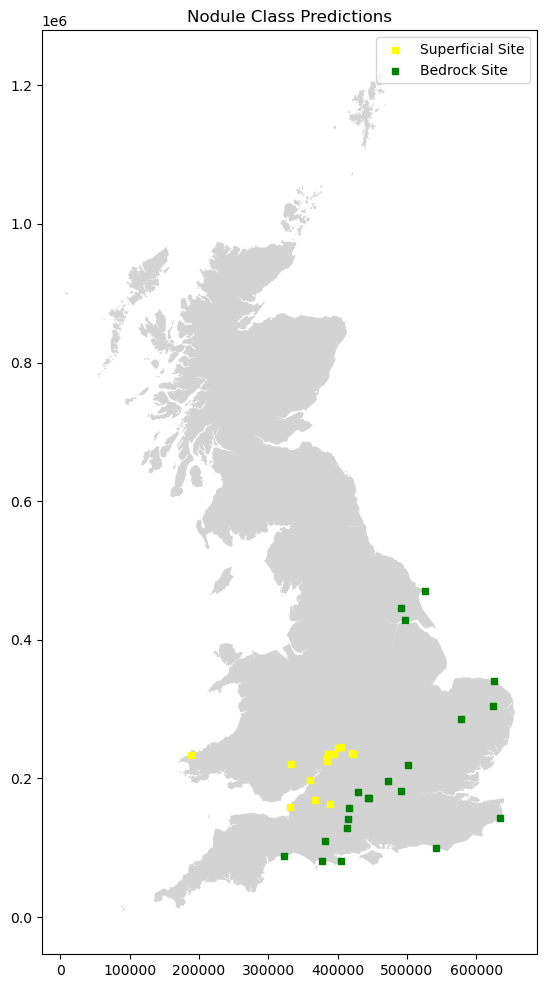

In [32]:

# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot background
mapping.plot(ax=ax, color='lightgrey')

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.any() and not bedrock_site_coords.any():
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

plt.title('Nodule Class Predictions')
plt.legend()
plt.show()



# DRAWING LINES

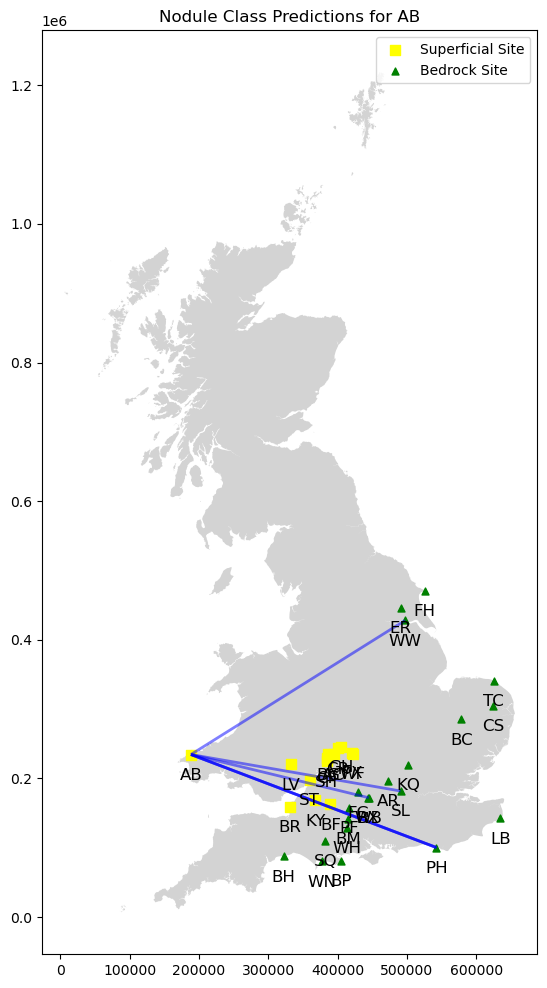

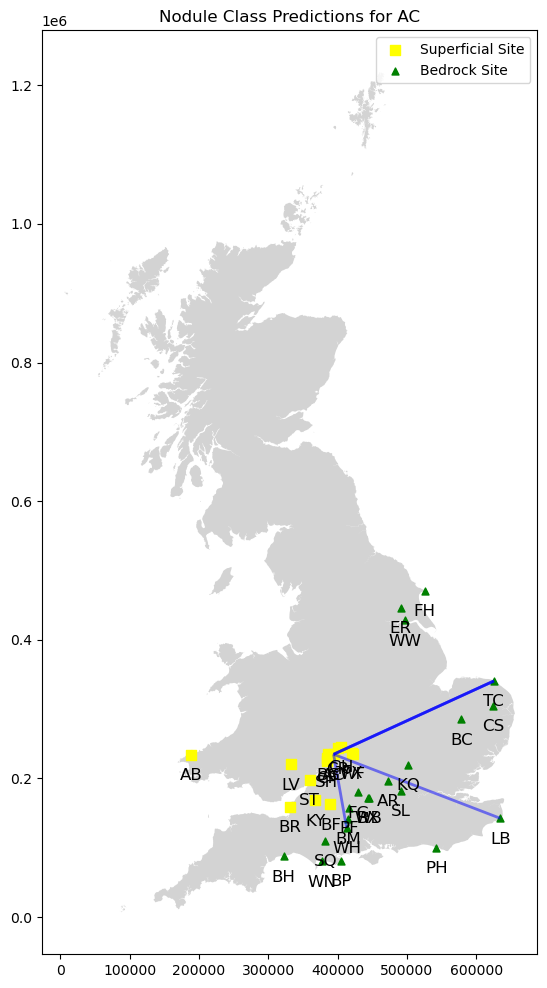

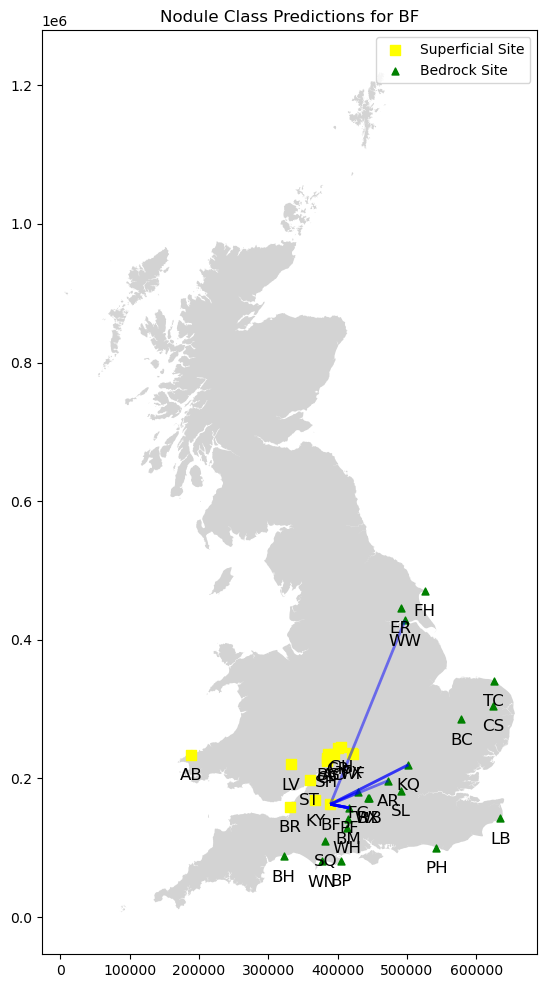

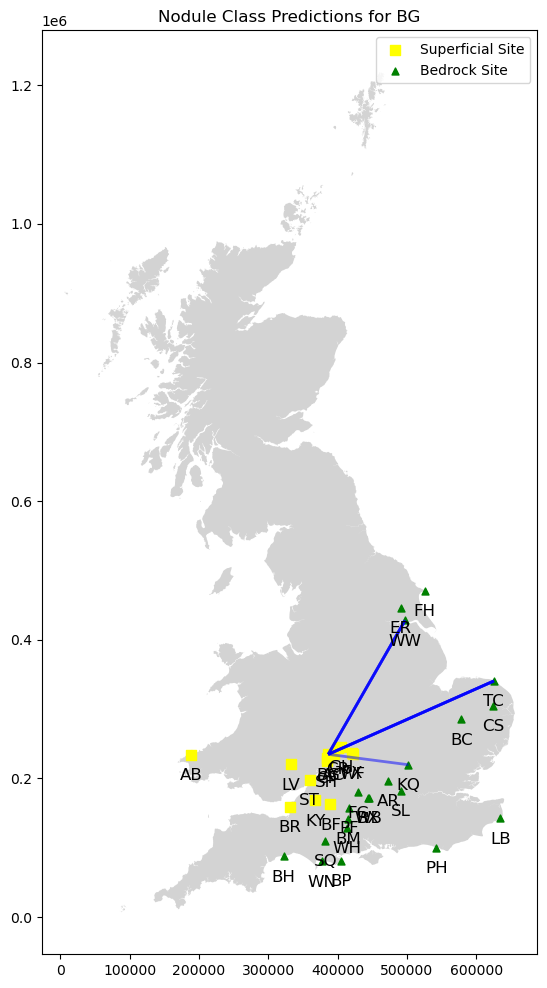

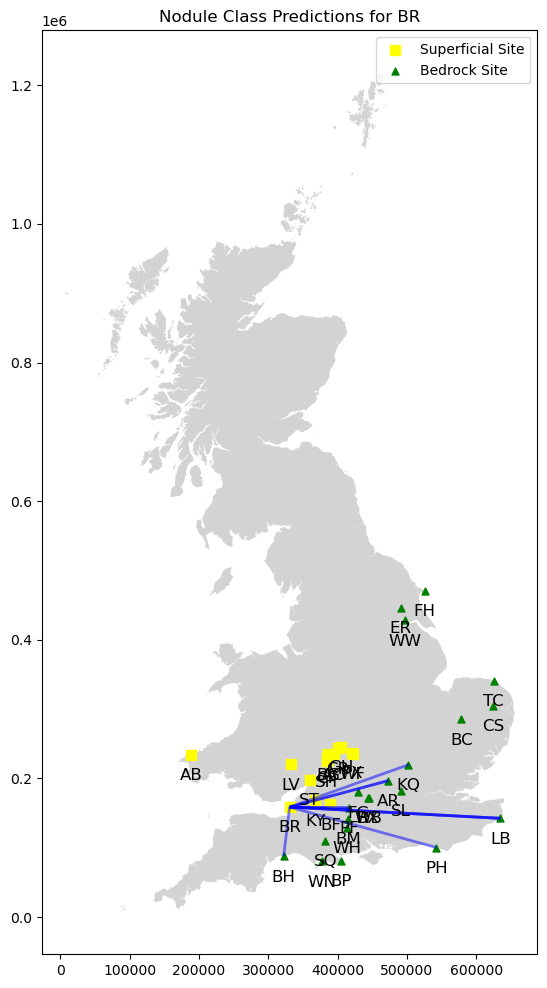

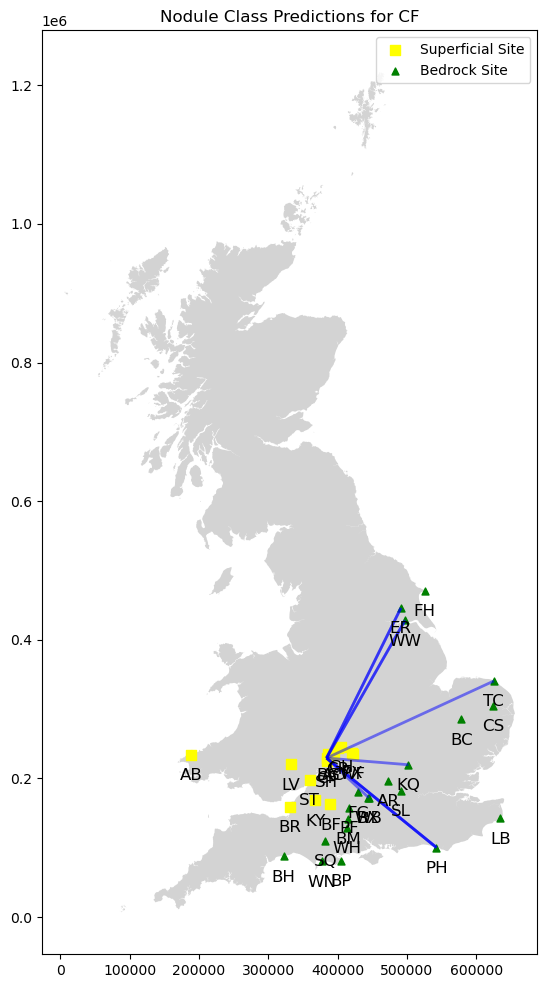

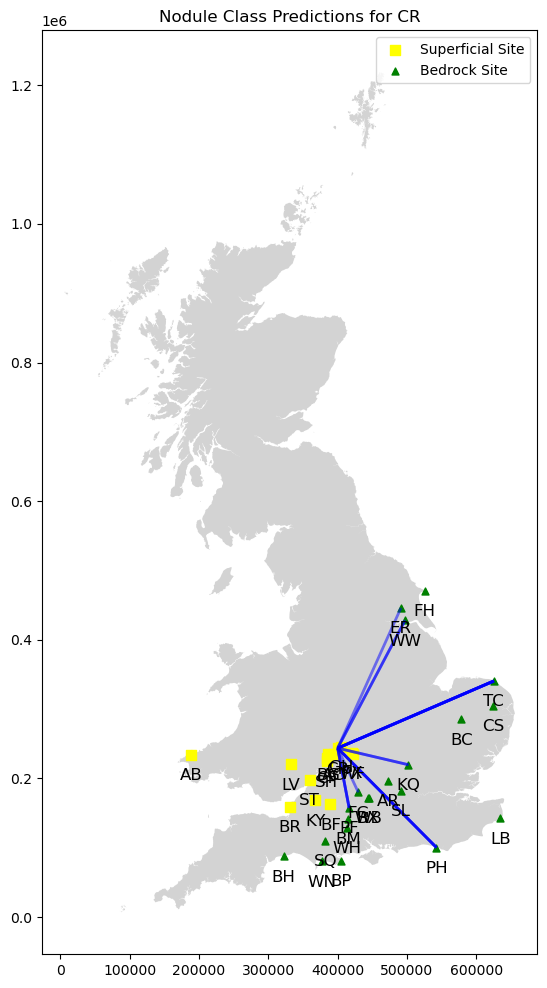

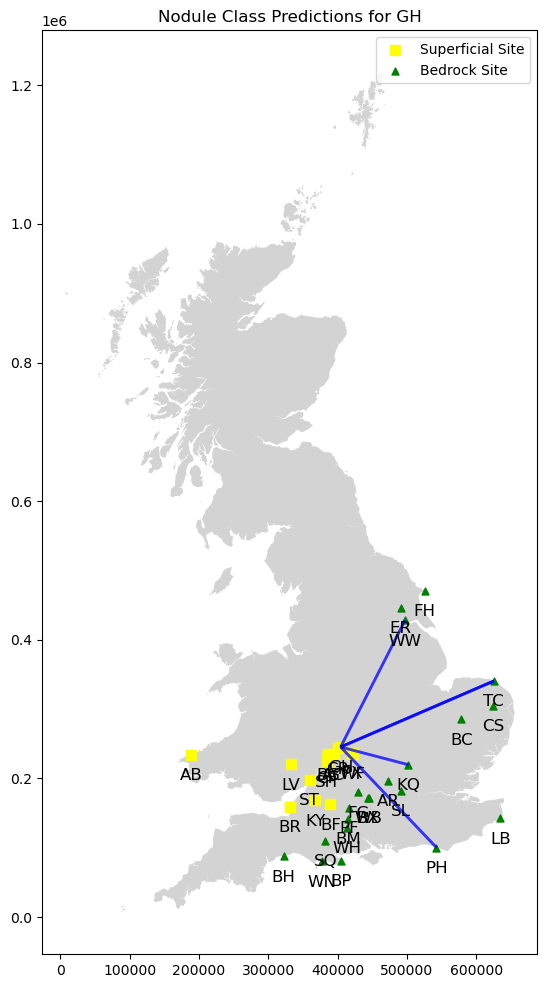

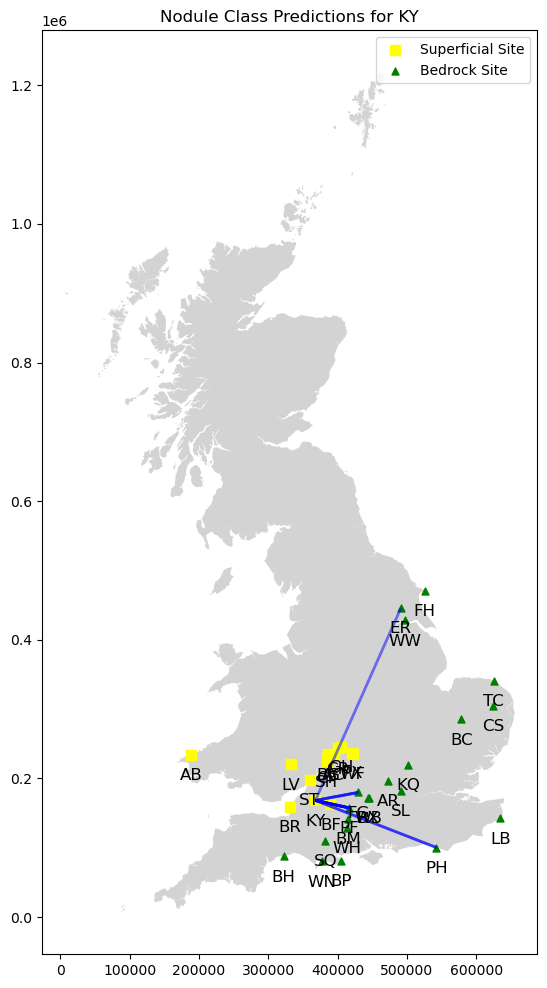

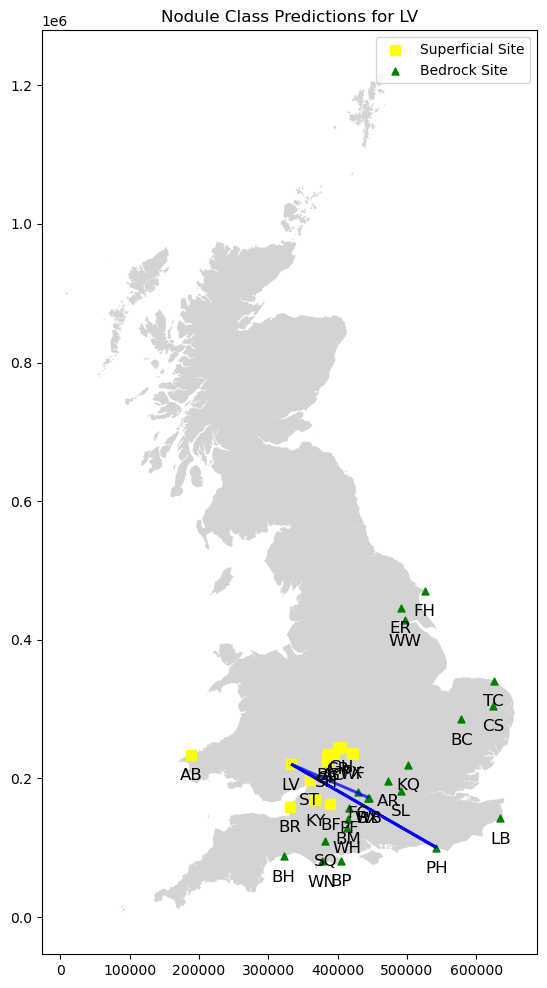

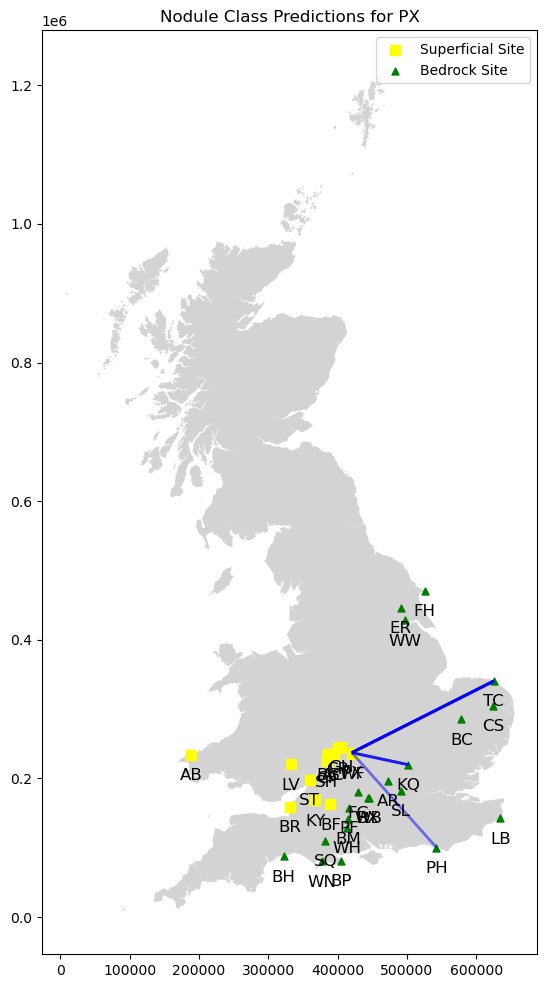

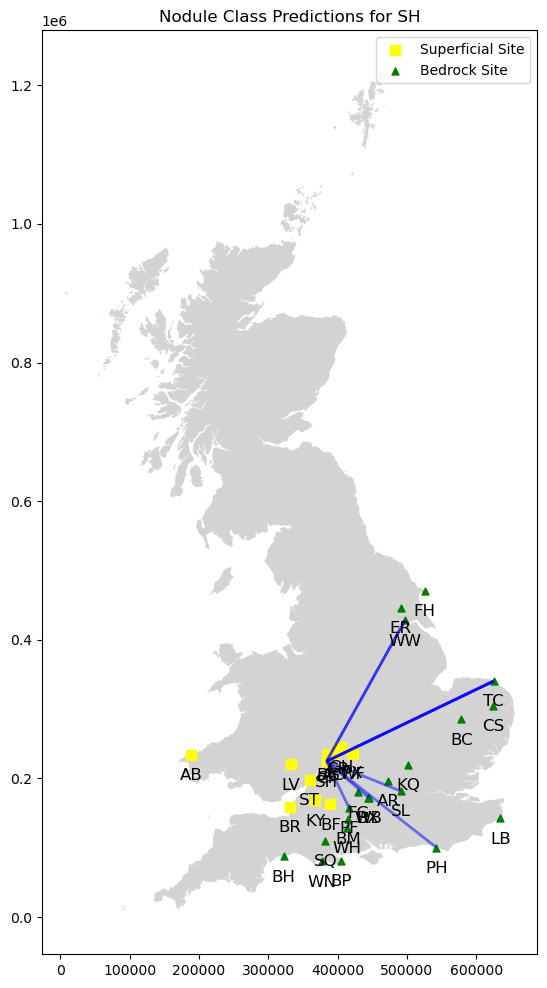

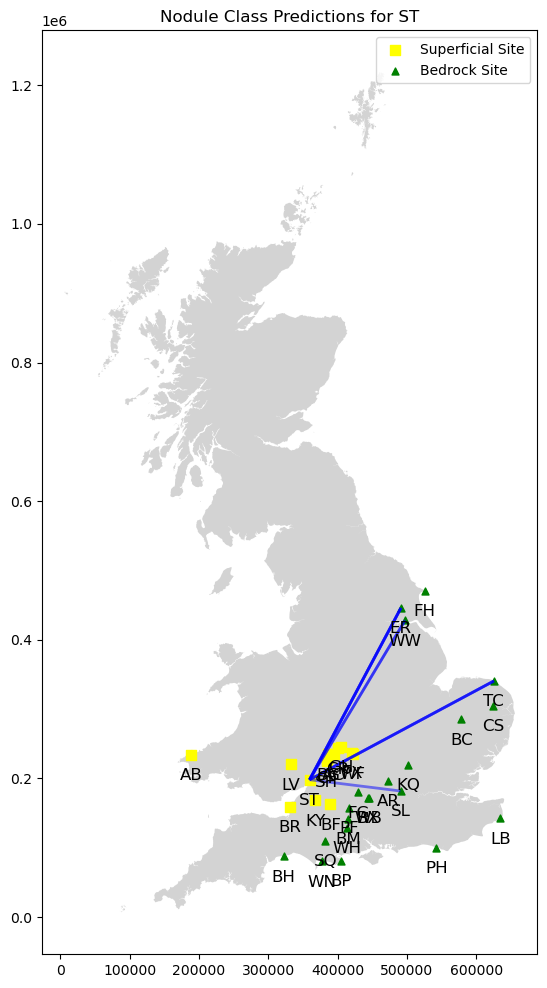

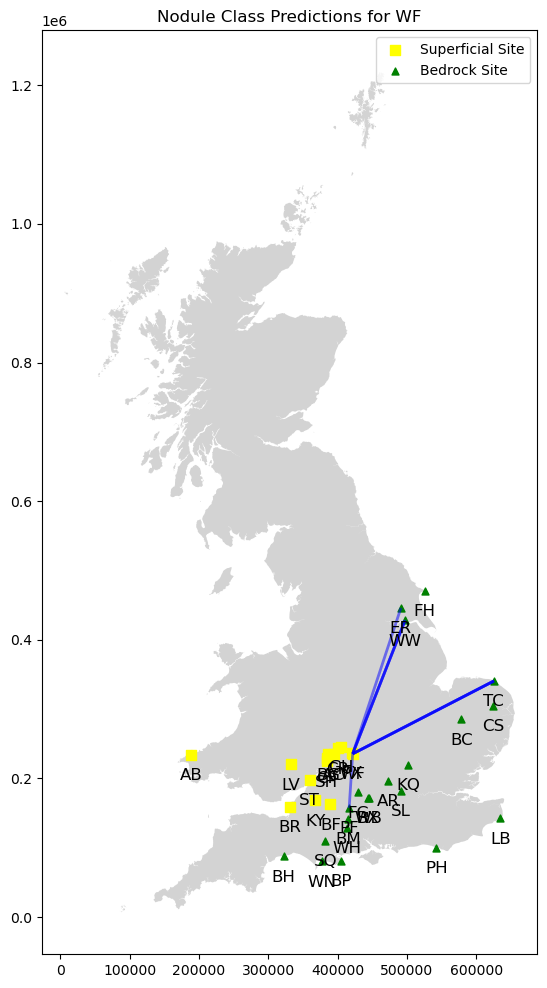

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, 
                                 geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Group the nodules by 'Superficial_Site'
grouped_by_superficial = grouped.groupby('Superficial_Site')

# Function to adjust label placement to prevent overlap
def adjust_label_placement(geom, label, ax, fontsize):
    x, y = geom.x, geom.y
    label_x, label_y = ax.transData.transform_point((x, y))
    
    # Define spacing between labels
    spacing = 8
    
    # Check if the label collides with any existing labels
    for existing_label, existing_position in adjust_label_placement.labels.items():
        if abs(label_x - existing_position[0]) < spacing and abs(label_y - existing_position[1]) < spacing:
            # If there is a collision, adjust the label's position
            label_y -= spacing * fontsize / 12  # Adjust spacing based on fontsize
    
    adjust_label_placement.labels[label] = (label_x, label_y)
    
    return label_x, label_y

# Initialize dictionary to store label positions
adjust_label_placement.labels = {}

# Iterate through each 'Superficial_Site' group
for superficial_site, group in grouped_by_superficial:
    # Create a new figure for each site
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot background
    mapping.plot(ax=ax, color='lightgrey')
    
    # Plot 'Superficial' sites as yellow squares
    superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
    superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=50, label='Superficial Site')
    
    # Label 'Superficial' sites
    for _, row in superficial_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=12)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=12,
                     ha='center', va='center', xytext=(0, -15), textcoords='offset points')
    
    # Plot 'Bedrock' sites as green triangles
    bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
    bedrock_gdf.plot(ax=ax, marker='^', color='green', markersize=25, label='Bedrock Site')
    
    # Label 'Bedrock' sites
    for _, row in bedrock_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=12)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=12,
                     ha='center', va='center', xytext=(0, -15), textcoords='offset points')
    
    # Filter the group to only include rows with the current 'Superficial_Site'
    group = group[group['Superficial_Site'] == superficial_site]
    
    # Iterate through the filtered group and create lines
    for _, row in group.iterrows():
        bedrock_site = row['class_prediction']
        
        # Filter the GeoDataFrames to get the corresponding coordinates
        superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        
        # Check if there are matching coordinates before creating the line
        if not superficial_site_coords.empty and not bedrock_site_coords.empty:
            superficial_coords = superficial_site_coords.values[0]
            bedrock_coords = bedrock_site_coords.values[0]

            # Create a LineString between the superficial site and the bedrock site
            line = LineString([superficial_coords, bedrock_coords])

            # Plot the LineString
            gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)
    
    plt.title(f'Nodule Class Predictions for {superficial_site}')
    plt.legend()
    plt.show()


# DRAWING LINES

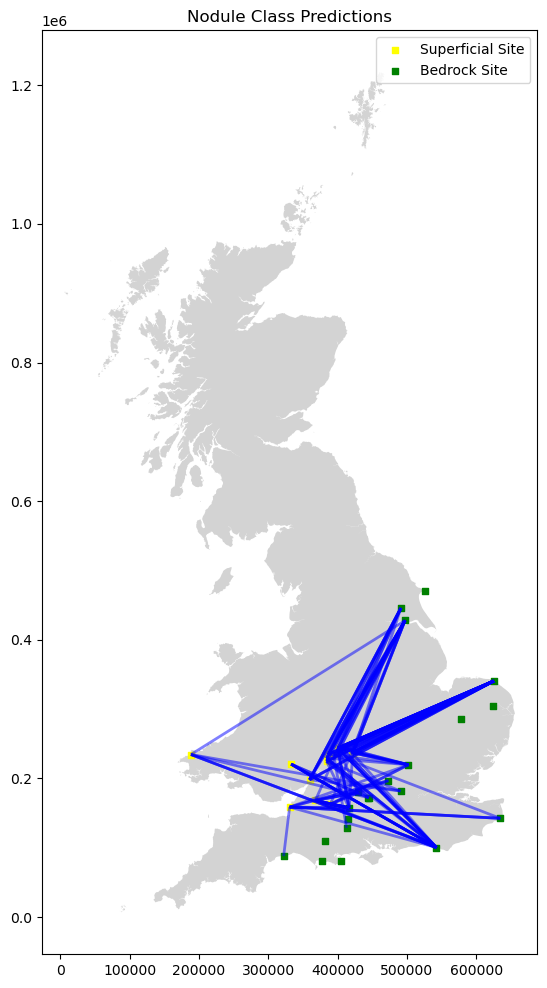

In [34]:
# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, 
                                 geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot background
mapping.plot(ax=ax, color='lightgrey')

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

plt.title('Nodule Class Predictions')
plt.legend()
plt.show()

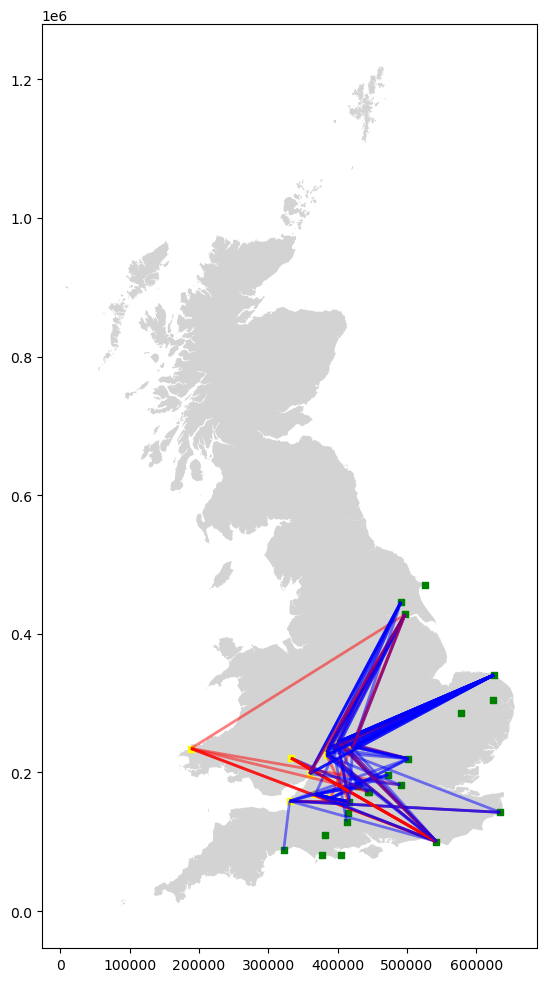

In [35]:
# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, 
                                 geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot background
mapping.plot(ax=ax, color='lightgrey')

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')


# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Check inlierLabel and change line color accordingly
        inlier_label = row.get('inlierLabel', 0)
        line_color = 'red' if inlier_label < 0 else 'blue'
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color=line_color, linewidth=2, alpha=0.5)


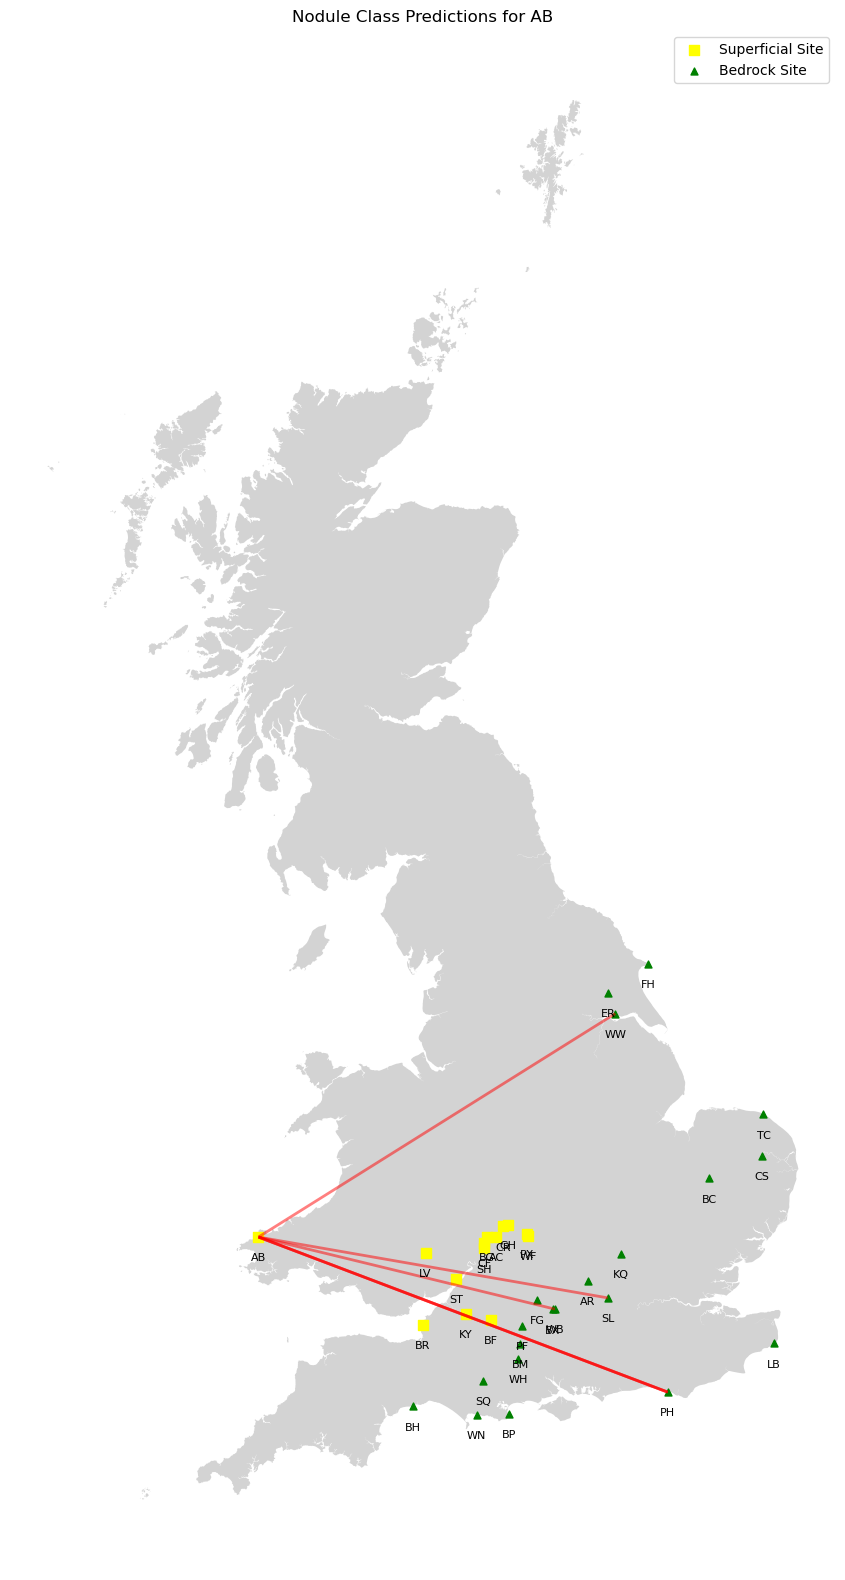

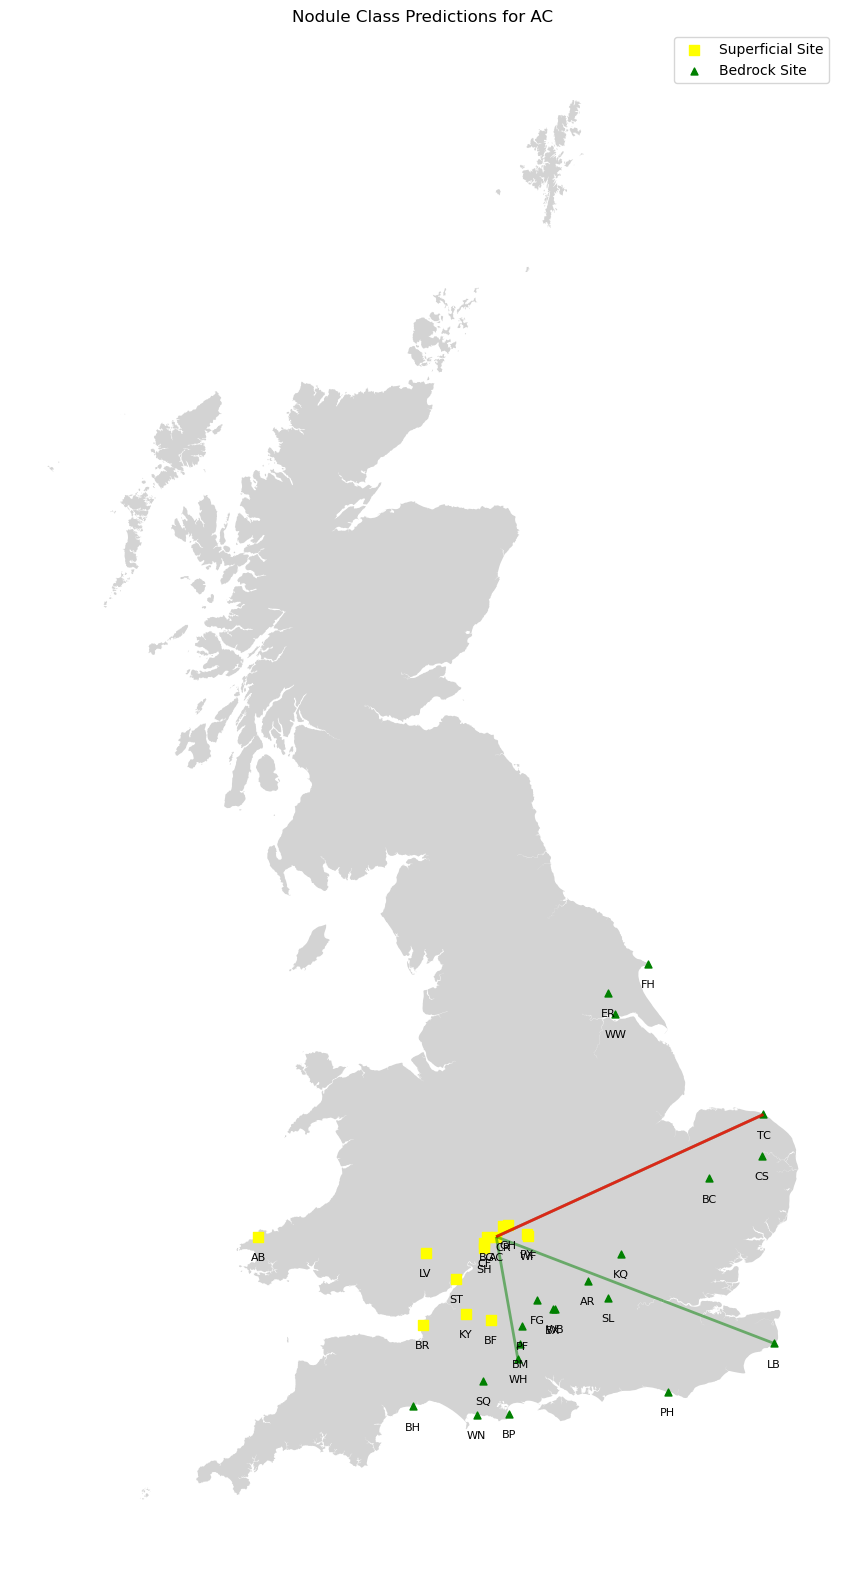

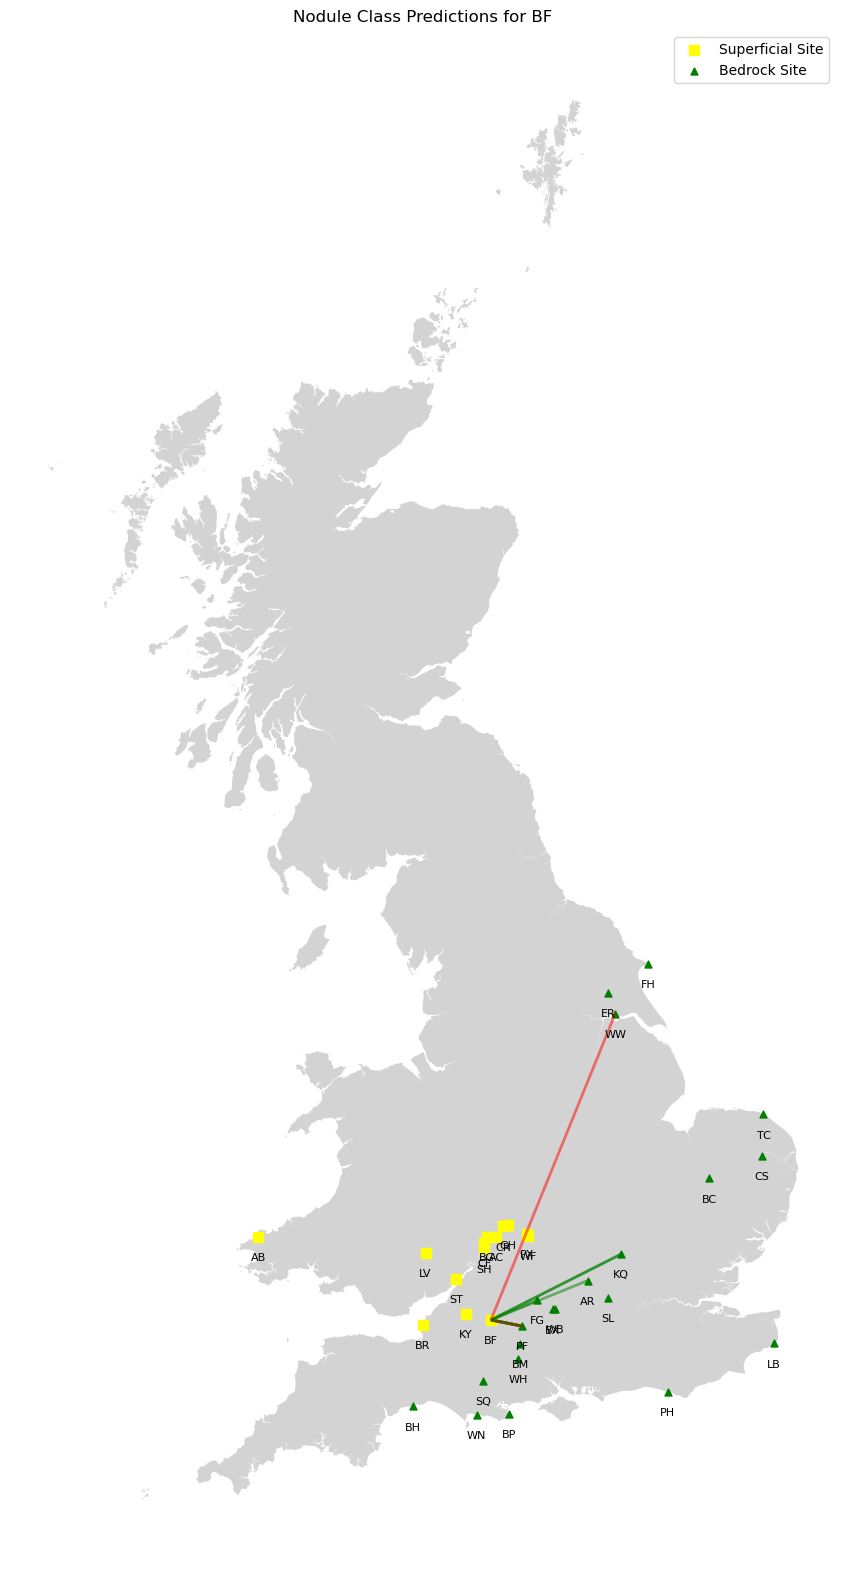

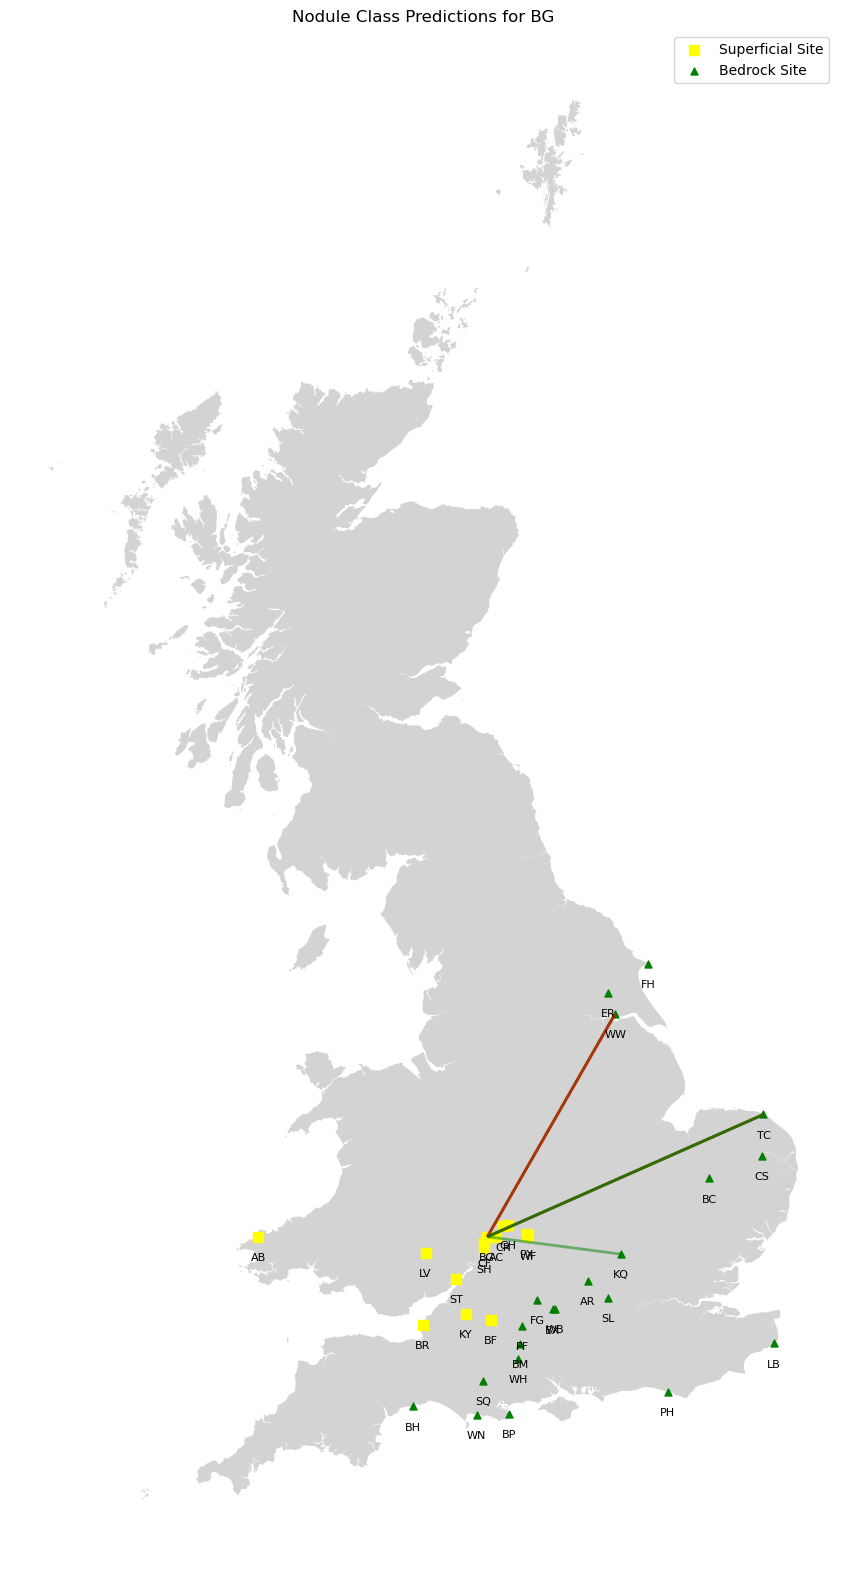

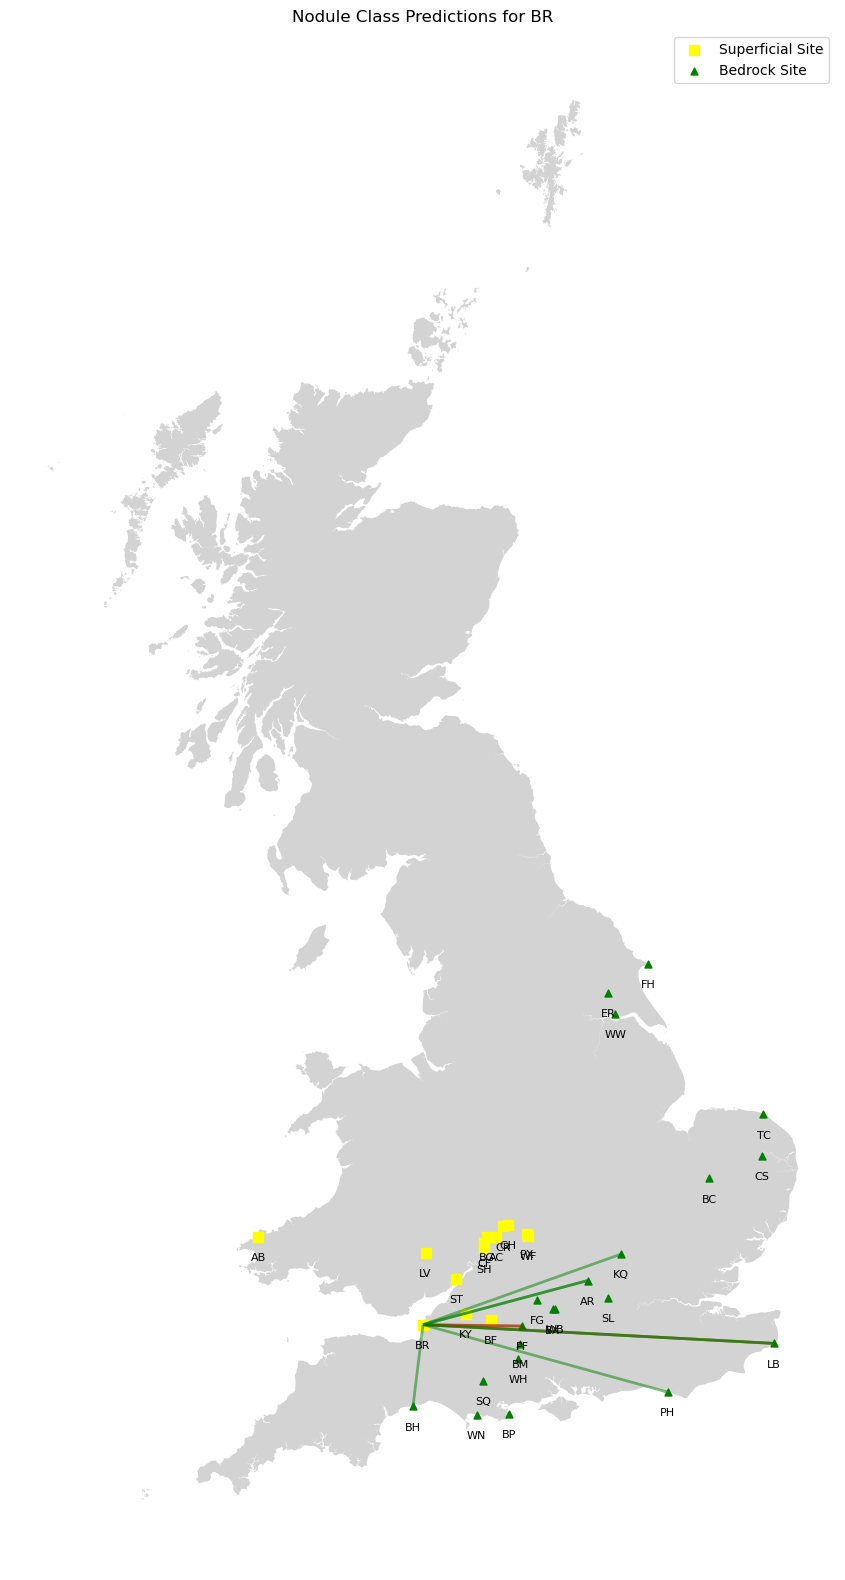

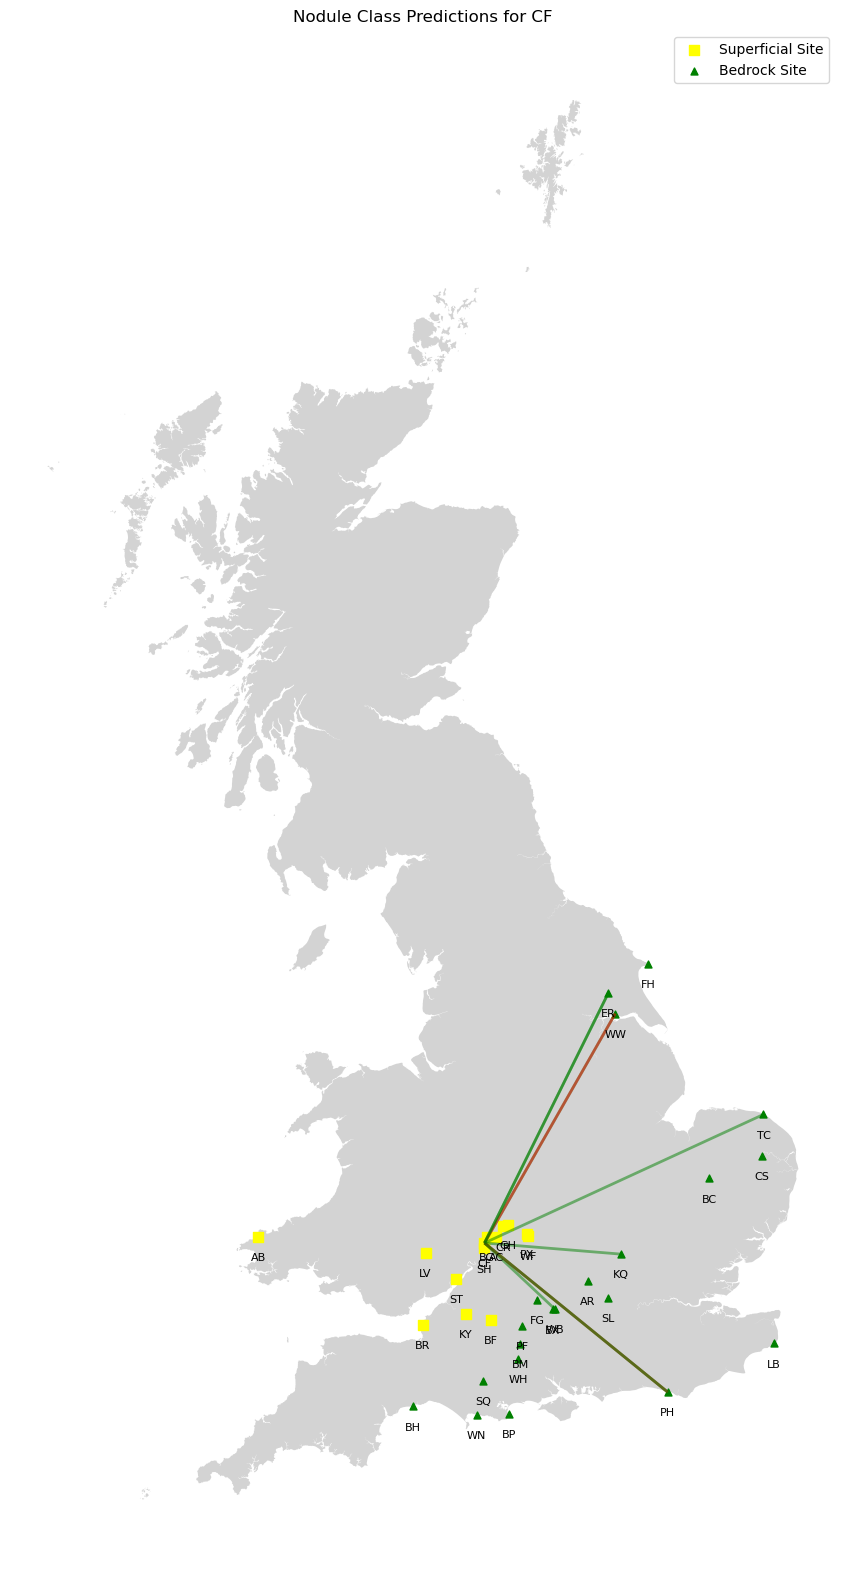

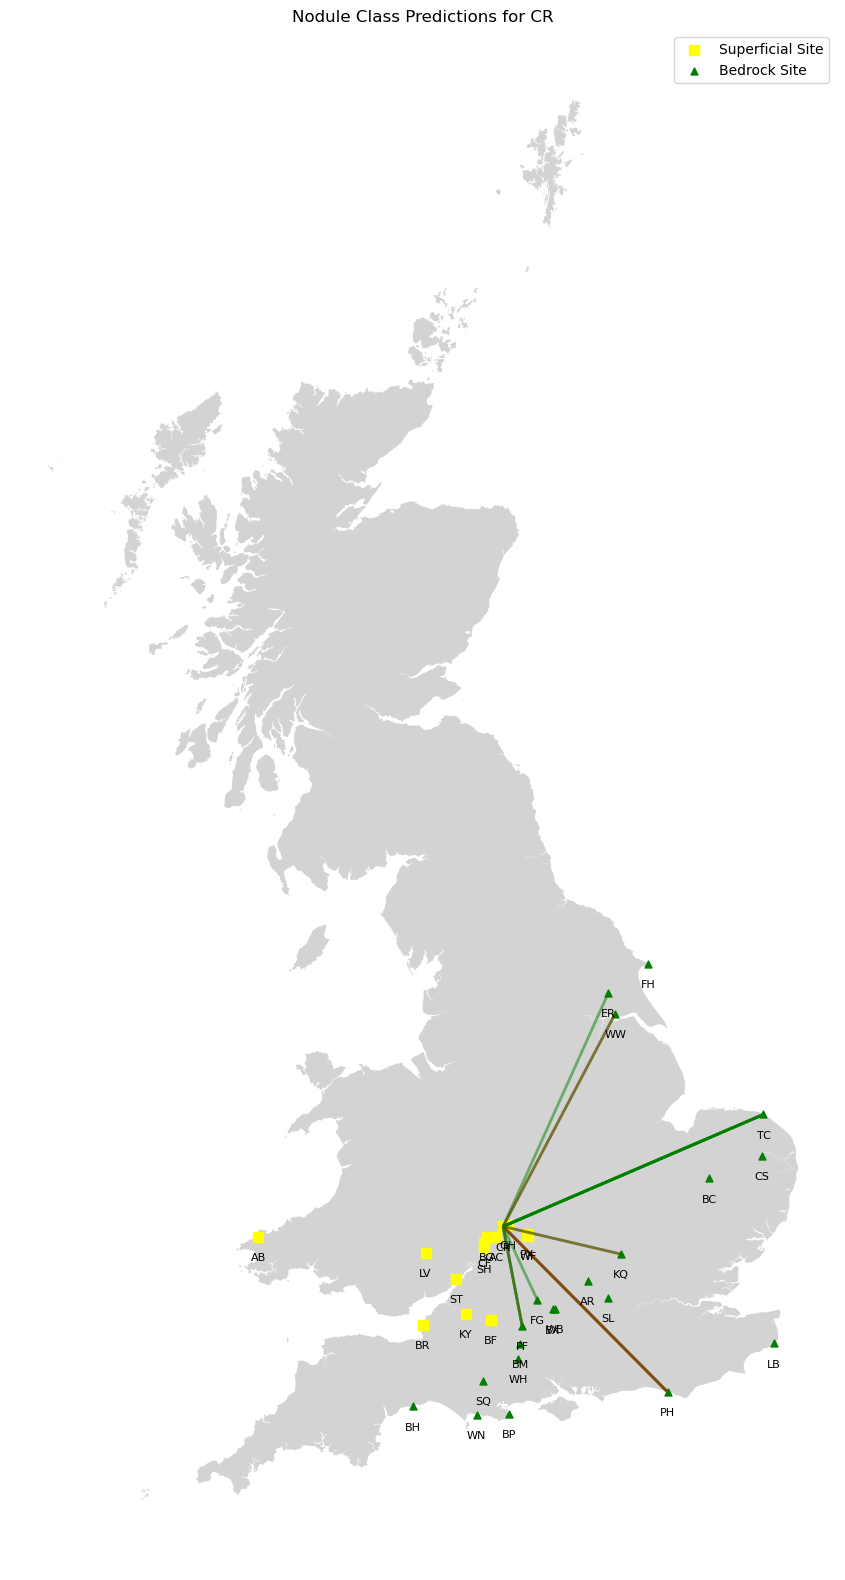

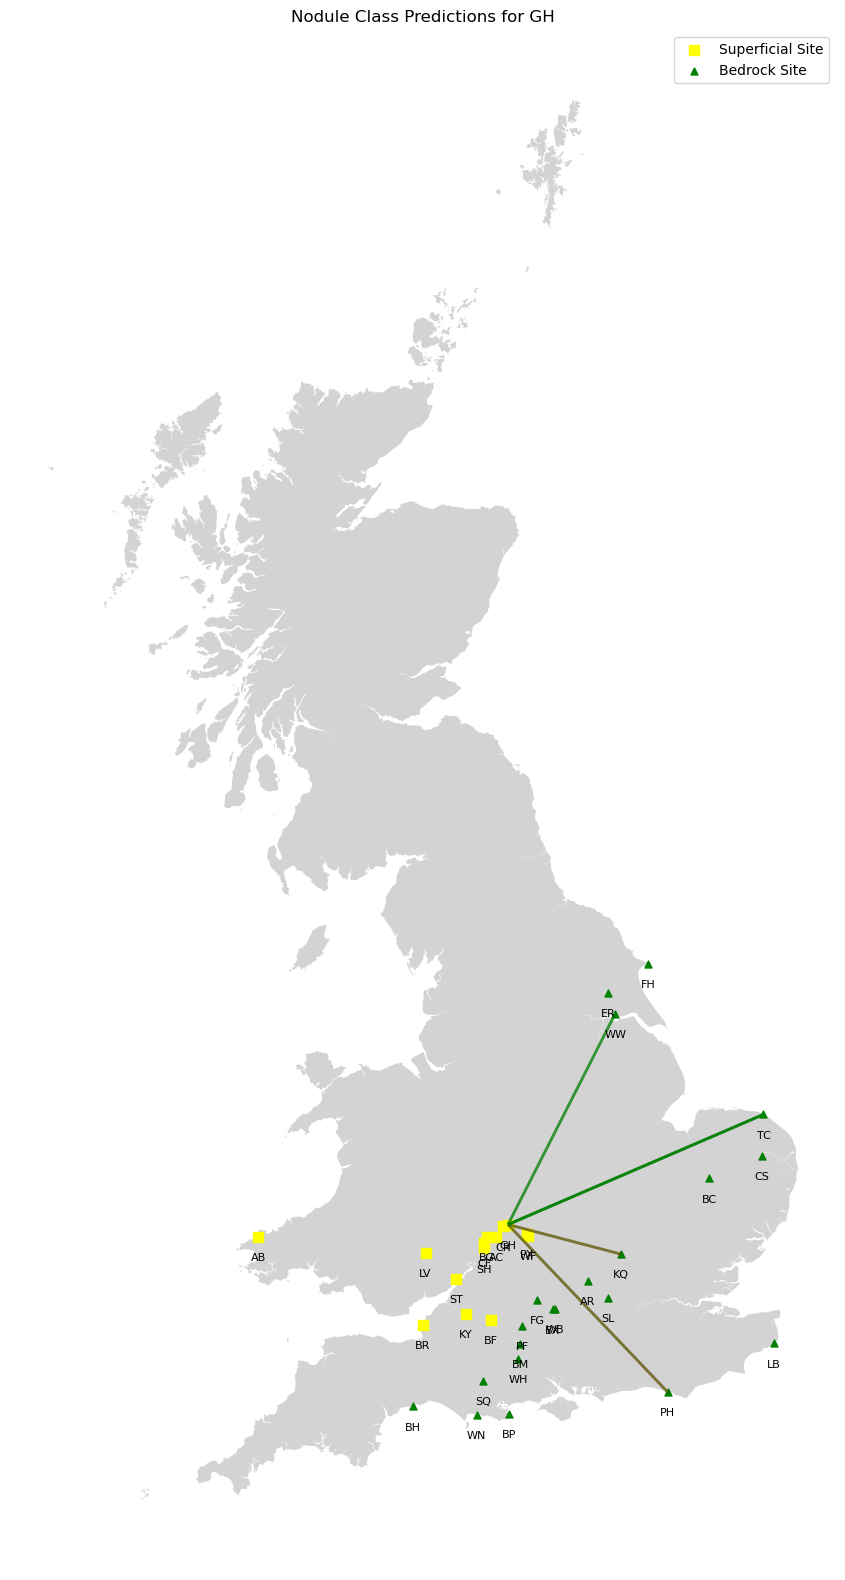

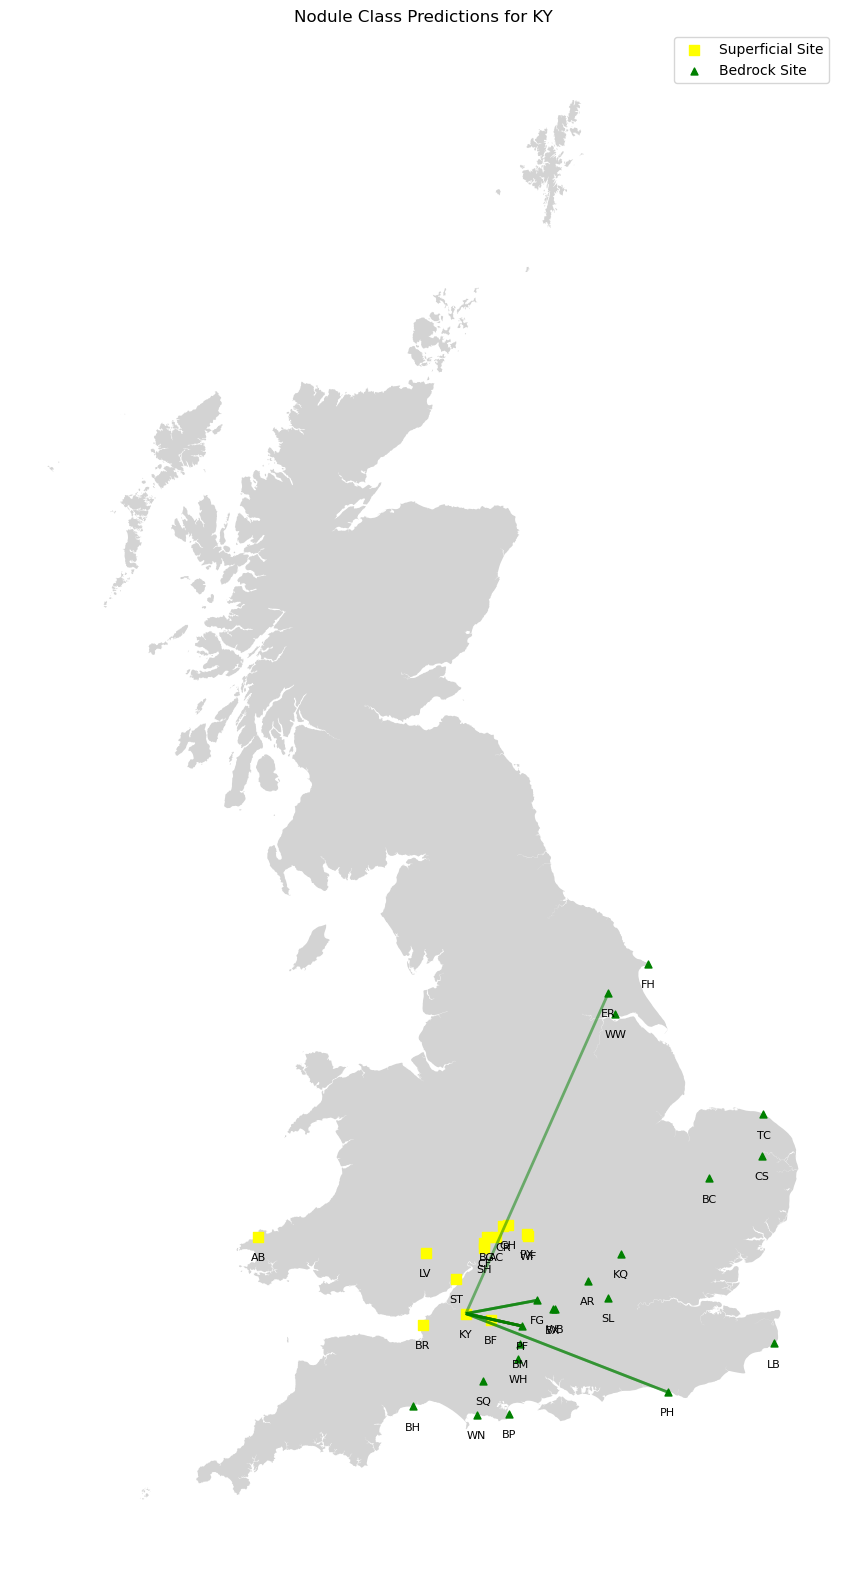

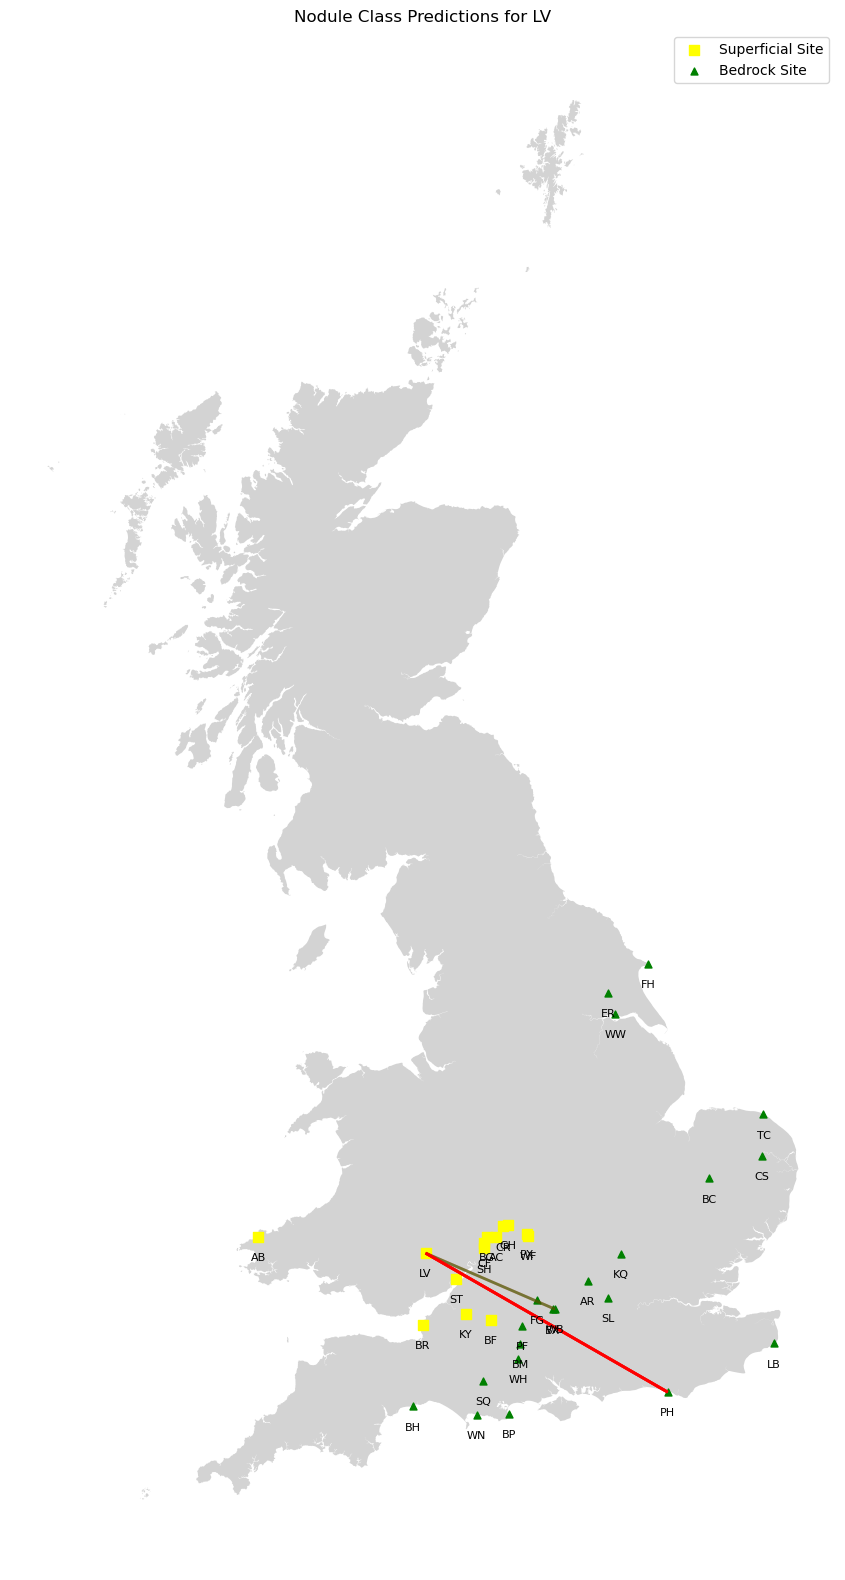

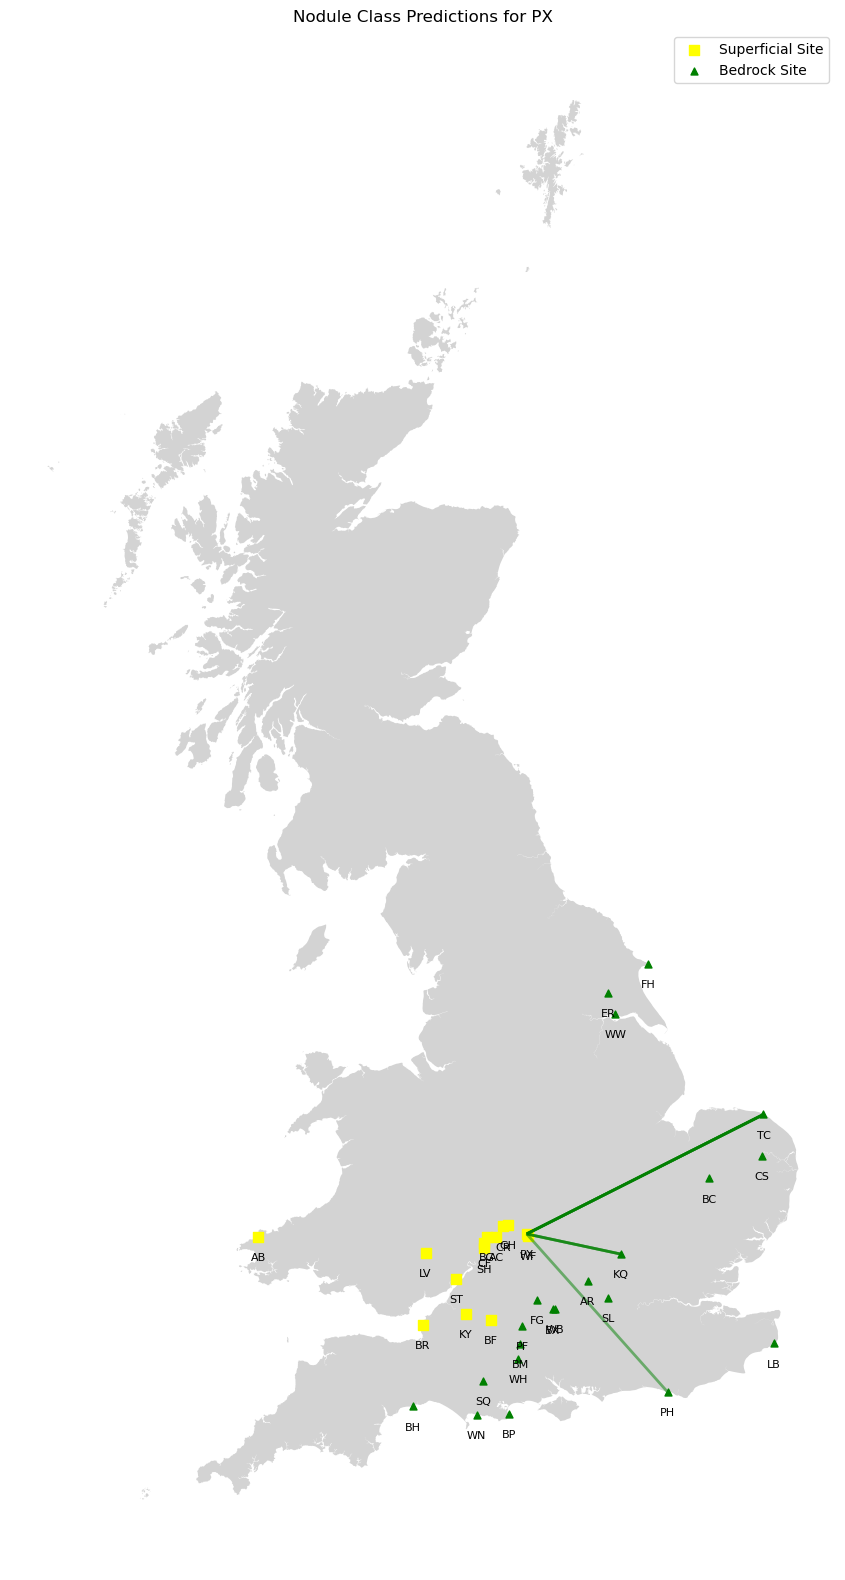

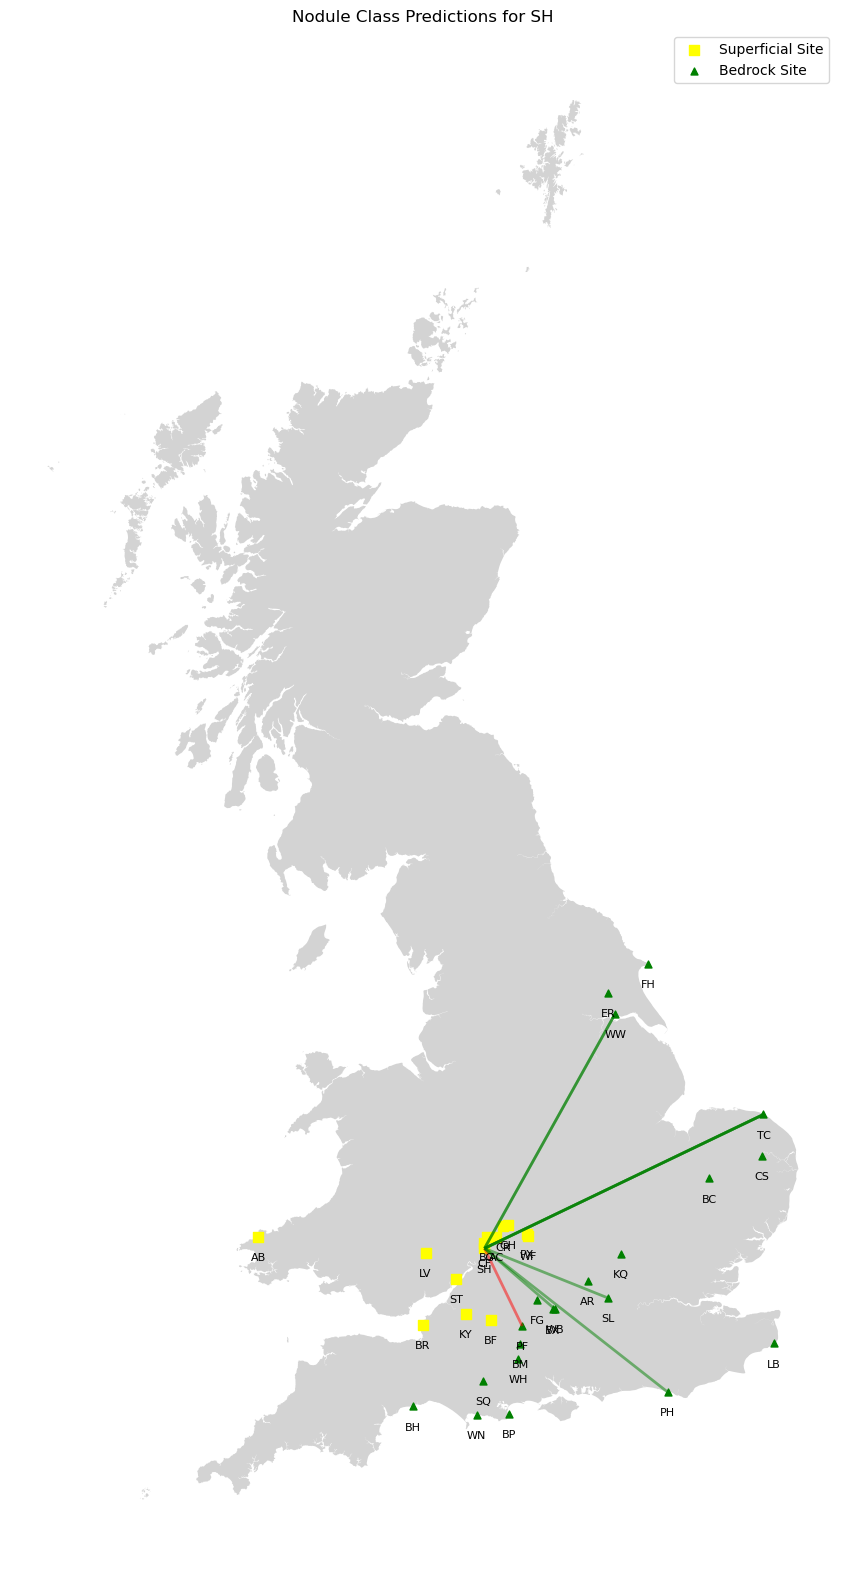

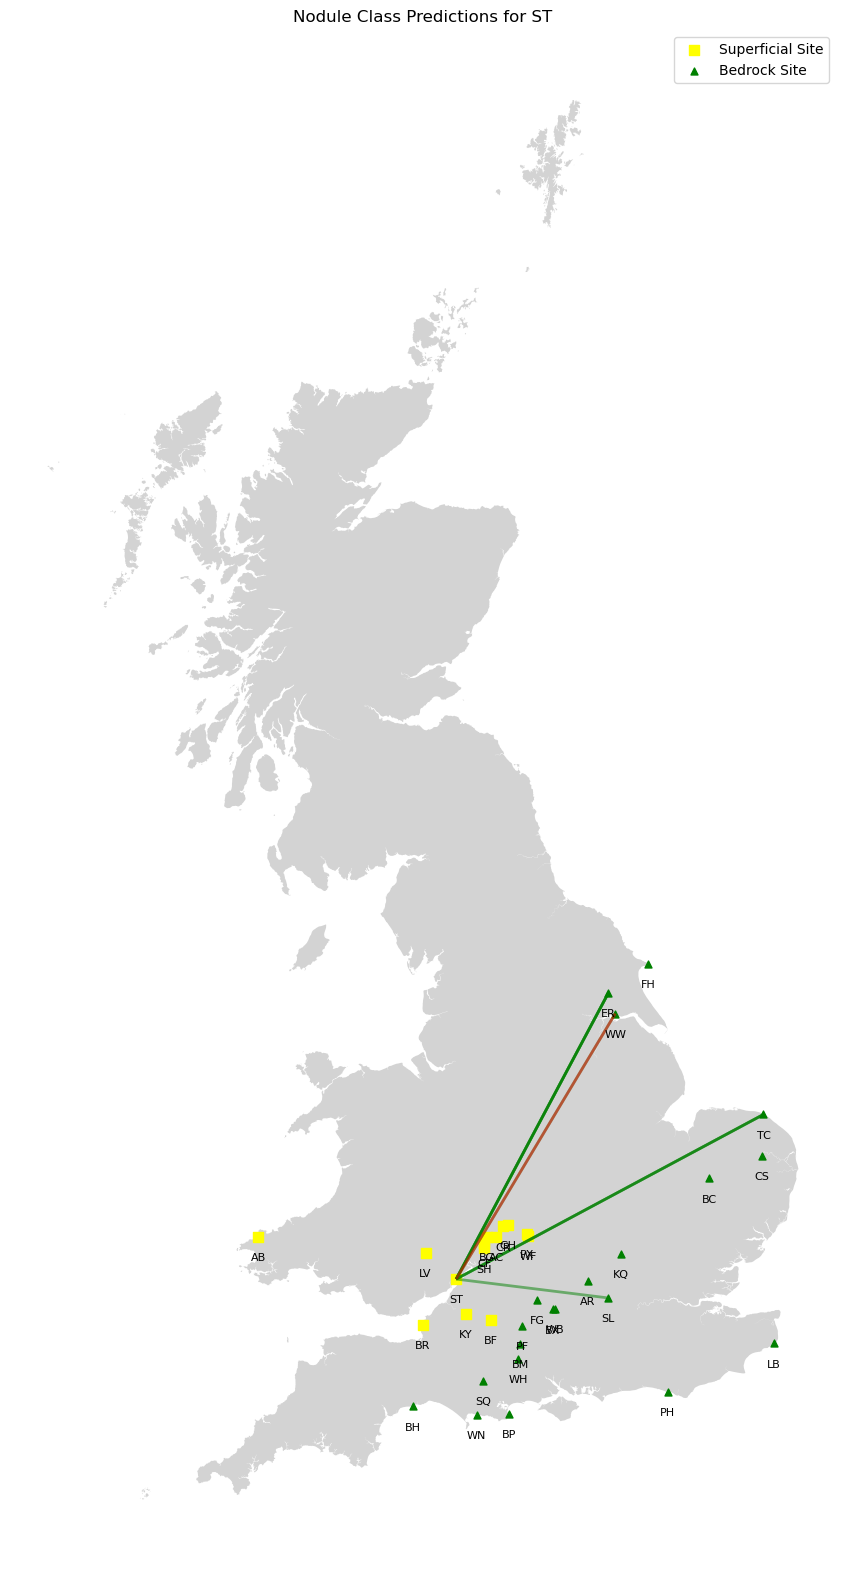

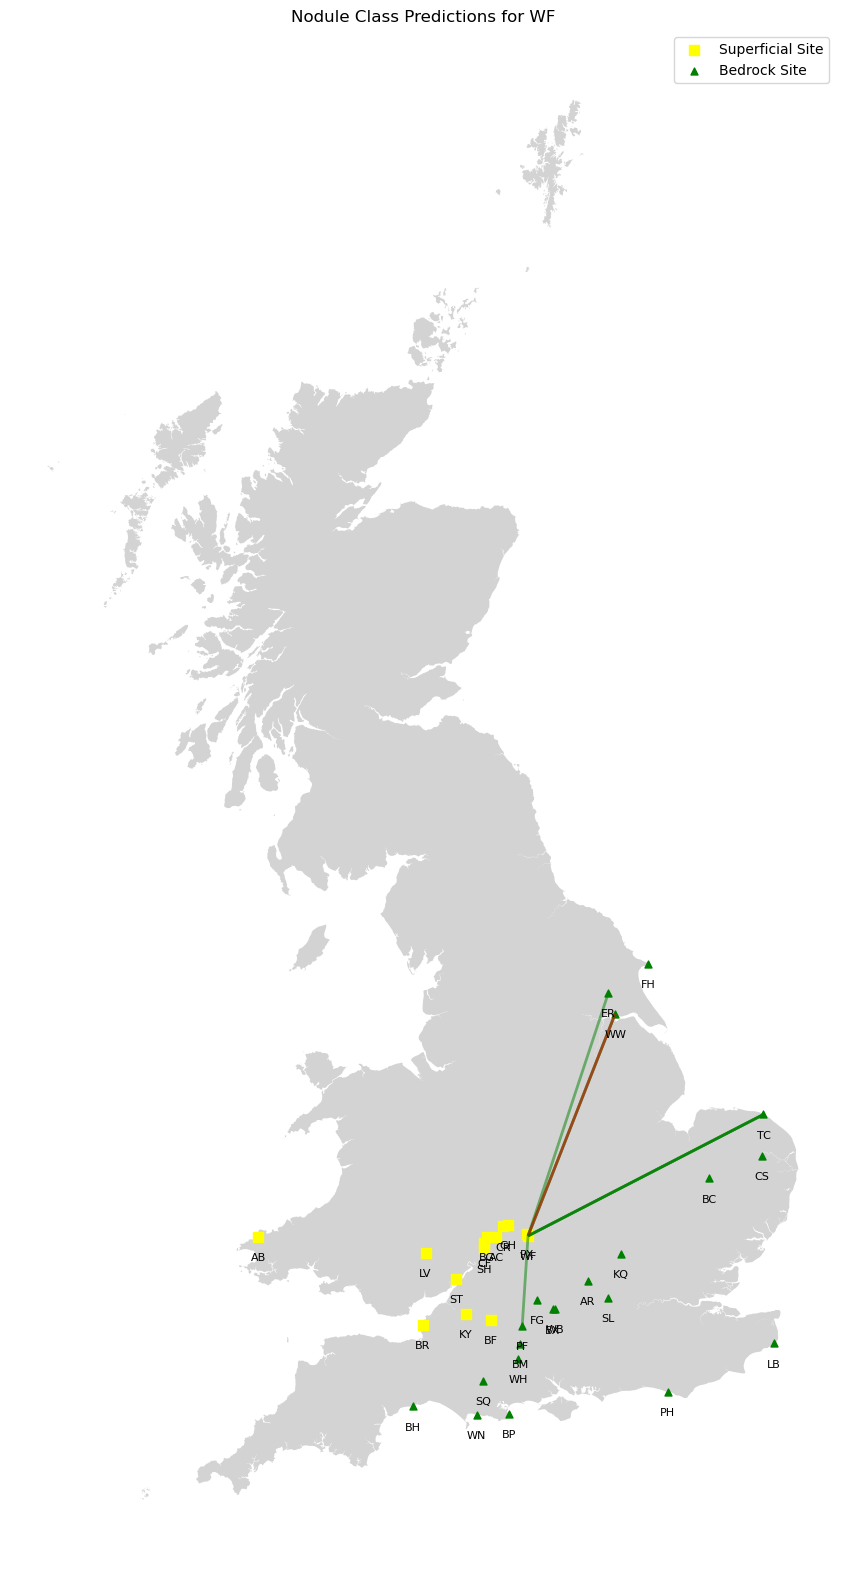

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from shapely.geometry import Point, LineString

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")
img = Image.open('B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif')


# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Group the nodules by 'Superficial_Site'
grouped_by_superficial = grouped.groupby('Superficial_Site')

# Function to adjust label placement to prevent overlap
def adjust_label_placement(geom, label, ax, fontsize):
    x, y = geom.x, geom.y
    label_x, label_y = ax.transData.transform_point((x, y))
    
    # Define spacing between labels
    spacing = 8
    
    # Check if the label collides with any existing labels
    for existing_label, existing_position in adjust_label_placement.labels.items():
        if abs(label_x - existing_position[0]) < spacing and abs(label_y - existing_position[1]) < spacing:
            # If there is a collision, adjust the label's position
            label_y -= spacing * fontsize / 6  # Adjust spacing based on fontsize
    
    adjust_label_placement.labels[label] = (label_x, label_y)
    
    return label_x, label_y

# Initialize dictionary to store label positions
adjust_label_placement.labels = {}

# Iterate through each 'Superficial_Site' group
for superficial_site, group in grouped_by_superficial:
    # Create a new figure for each site
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Plot background
    mapping.plot(ax=ax, color='lightgrey')
    
    
    # Plot 'Superficial' sites as yellow squares
    superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
    superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=50, label='Superficial Site')
    
    # Label 'Superficial' sites
    for _, row in superficial_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=8)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=8,
                     ha='center', va='center', xytext=(0, -15), textcoords='offset points')
    
    # Plot 'Bedrock' sites as green triangles
    bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
    bedrock_gdf.plot(ax=ax, marker='^', color='green', markersize=25, label='Bedrock Site')
    
    # Label 'Bedrock' sites
    for _, row in bedrock_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=8)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=8,
                     ha='center', va='center', xytext=(0, -15), textcoords='offset points')
    
    # Filter the group to only include rows with the current 'Superficial_Site'
    group = group[group['Superficial_Site'] == superficial_site]
    
    # Iterate through the filtered group and create lines
    for _, row in group.iterrows():
        bedrock_site = row['class_prediction']
        
        # Filter the GeoDataFrames to get the corresponding coordinates
        superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        
        # Check if there are matching coordinates before creating the line
        if not superficial_site_coords.empty and not bedrock_site_coords.empty:
            superficial_coords = superficial_site_coords.values[0]
            bedrock_coords = bedrock_site_coords.values[0]

            # Create a LineString between the superficial site and the bedrock site
            line = LineString([superficial_coords, bedrock_coords])
            
            # Check inlierLabel and change line color accordingly
            inlier_label = row.get('inlierLabel', 0)
            line_color = 'red' if inlier_label < 0 else 'green'
        
            # Plot the LineString
            gpd.GeoSeries([line]).plot(ax=ax, color=line_color, linewidth=2, alpha=0.5)
    
    
    # Remove x and y axis markers
    ax.set_axis_off()
    
    
    plt.title(f'Nodule Class Predictions for {superficial_site}')
    plt.legend()
    
    plt.show()


In [37]:
from PIL import Image
import matplotlib.image as mpimg

In [38]:
img = Image.open('B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif')

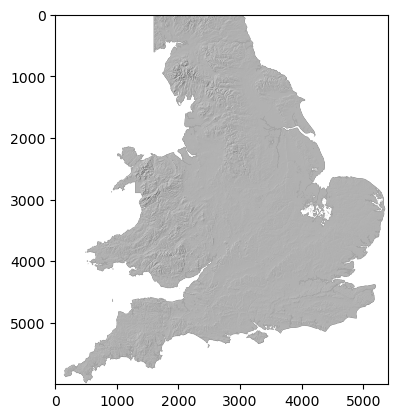

In [39]:
imgplot = plt.imshow(img)

In [40]:
from osgeo import gdal

In [41]:
img = "B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"

In [42]:
rasterMap = gdal.Open(img)

NameError: name 'show' is not defined

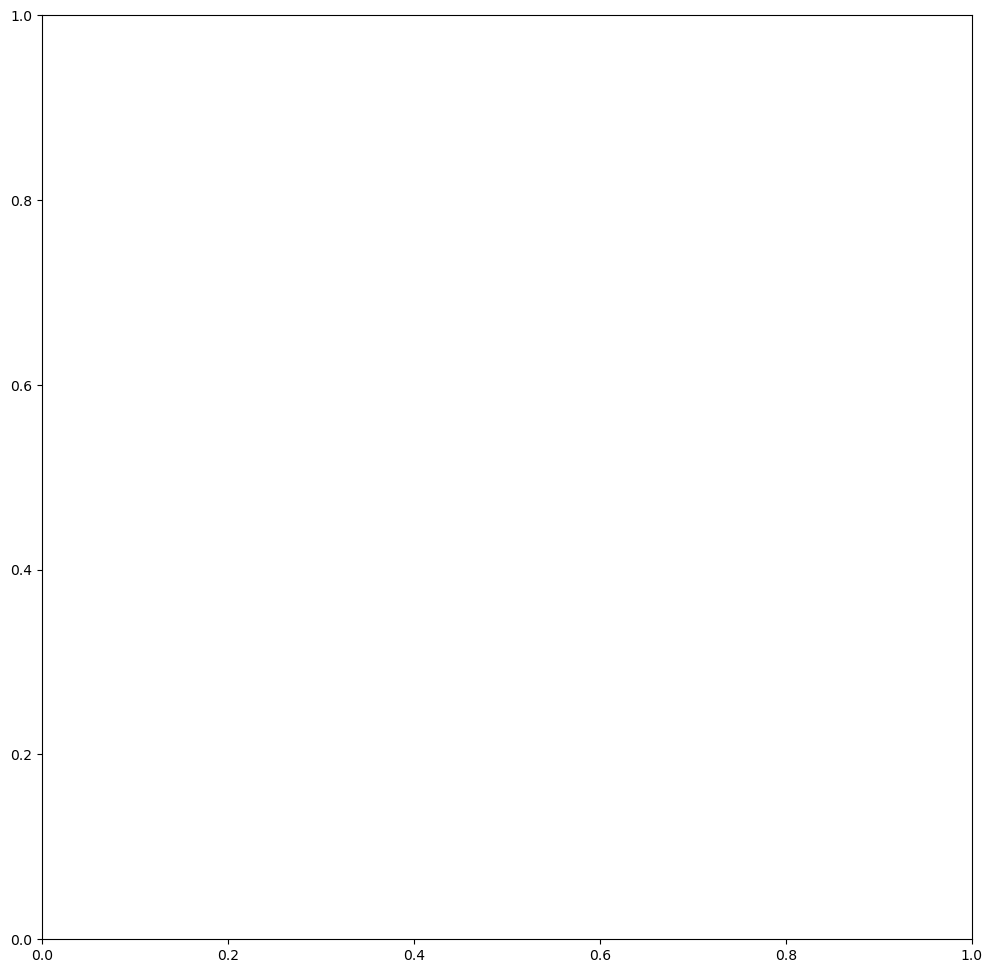

In [43]:

# Extract geotransform information
transform = rasterMap.GetGeoTransform()

# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Display the raster data as a background
show((rasterMap, 1), ax=ax, cmap='gray', transform=transform)

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

# Remove x and y axis markers
ax.set_axis_off()

plt.title('Nodule Class Predictions')
plt.legend()
plt.show()

In [ ]:
import matplotlib.image as mpimg

# Load your raster image
raster_image_path = "B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"
raster_image = mpimg.imread(raster_image_path)

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))


# Set x-axis and y-axis limits to define the coordinate system
#ax.set_xlim(0, 100000)
#ax.set_ylim(-100000, 0)

## Get the current x-axis and y-axis limits
#x_limits = ax.get_xlim()
#y_limits = ax.get_ylim()

#print("Current x-axis limits:", x_limits)
#print("Current y-axis limits:", y_limits)




# Plot your other data on top of the raster image
# For example, plot 'Superficial' sites as yellow squares
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame and plot lines
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)
        
# Display the raster data as a background
#ax.imshow(raster_image, extent=[0.0, 5400.0, -6000.0, 0.0], cmap='gray', origin='upper')

# Add labels, legend, and other customizations as needed
plt.title('Nodule Class Predictions')
plt.legend()
plt.axis('off')  # Turn off axis markers
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import LineString
import geopandas as gpd

# Load your raster image
raster_image_path = "B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"
raster_image = mpimg.imread(raster_image_path)

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Set x-axis and y-axis limits to define the coordinate system
ax.set_xlim(0, 5400)
ax.set_ylim(-6000, 0)

# Plot your other data on top of the raster image
# For example, plot 'Superficial' sites as yellow squares
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Precompute lines
lines = []
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']

    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']

    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        lines.append(line)

# Display the raster data as a background
ax.imshow(raster_image, extent=[0.0, 5400.0, -6000.0, 0.0], cmap='gray', origin='upper')

# Plot the precomputed lines
gpd.GeoSeries(lines).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

# Add labels, legend, and other customizations as needed
plt.title('Nodule Class Predictions')
plt.legend()
plt.axis('off')  # Turn off axis markers
plt.show()


In [44]:
img = Image.open('B:\OneDrive\Documents\1. PhD\GIS\2. Data\BGS_Data\Cretaceous_Only.lyr')
imgplot = plt.imshow(img)


OSError: [Errno 22] Invalid argument: 'B:\\OneDrive\\Documents\x01. PhD\\GIS\x02. Data\\BGS_Data\\Cretaceous_Only.lyr'